### Context

#### About organization:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

#### Problem Statement:

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

#### Objective:

To categorise the countries using socio-economic and health factors that determine the overall development of the country.

### Attribute Information

- country: Name of the country  
- child_mort: Death of children under 5 years of age per 1000 live births  
- exports: Exports of goods and services per capita. Given as %age of the GDP per capita  
- health: Total health spending per capita. Given as %age of GDP per capita  
- imports: Imports of goods and services per capita. Given as %age of the GDP per capita  
- Income: Net income per person  
- Inflation: The measurement of the annual growth rate of the Total GDP  
- life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same  
- total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same  
- gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population  

### Data Source
- Dataset: [kaggle](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data)

### Data Importing and Overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Data/archive/Country-data.csv')

In [3]:
df.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Data Cleaning

In [6]:
df[df['inflation'] == df['inflation'].min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
131,Seychelles,14.4,93.8,3.4,108.0,20400,-4.21,73.4,2.17,10800


Negative inflation, often referred to as deflation, is a decrease in the general price level of goods and services over a period of time. While it might seem like a positive event because it implies lower prices, it often has complex and potentially harmful effects on an economy:

1. **Reduced Consumer Spending**: When prices are falling, consumers may delay purchases in anticipation of further decreases in prices. This can lead to a reduction in overall consumer spending, which is a major component of economic activity.

2. **Increased Real Debt Burden**: If the nominal value of debt remains fixed, but prices and incomes fall, the real value of debt increases. This can make it more difficult for households and businesses to service their debts, potentially leading to higher default rates.

3. **Lower Profits for Businesses**: As prices fall, the revenue that businesses generate from selling goods and services may decline. If costs do not decrease at the same rate, profit margins can be squeezed, leading to reduced capital investment and possibly layoffs.

4. **Economic Recession**: The combination of reduced consumer spending, higher real debt burdens, and lower business profits can lead to a cycle of negative economic growth, increasing unemployment, and further deflation.

5. **Wage Spiral**: In some cases, deflation can lead to a downward spiral in wages as businesses attempt to cut costs in response to falling prices and declining demand. This can further reduce consumer spending and exacerbate economic decline.

6. **Policy Challenges**: Deflation can be difficult to manage through monetary policy. Central banks typically lower interest rates to combat deflation, but when rates are already low, they might hit the zero lower bound, beyond which they cannot be reduced further. This limits the effectiveness of monetary policy as a tool to stimulate the economy.

7. **Asset Price Deflation**: The prices of assets such as real estate and stocks may fall during deflationary periods, leading to losses for investors and impacting the broader financial system.

In [7]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
df.duplicated().sum()

0

### EDA

#### Univariate Analysis

##### Statistical Methods
1. **Mean**: Provides the average value, giving you a sense of the central tendency.
2. **Median**: The middle value in your data set, which is useful especially when your data is skewed.
3. **Mode**: The most frequently occurring value in the dataset.
4. **Range**: The difference between the maximum and minimum values, indicating the spread.
5. **Variance and Standard Deviation**: Measures of the spread or dispersion of your data around the mean.
6. **Quartiles and Percentiles**: These can help you understand the distribution of your data beyond the central tendency.
7. **Skewness and Kurtosis**: These metrics tell you about the asymmetry and the tailedness of the data distribution respectively.

##### Graphical Techniques
1. **Histogram**: Shows the frequency distribution of your data and is ideal for understanding the shape of the distribution, central tendencies, and spread.
2. **Box Plot (Box and Whisker Plot)**: Useful for visualizing the median, quartiles, and potential outliers in your data.
3. **Density Plot**: A smoothed version of the histogram, often used for understanding the distribution shape and identifying modes.
4. **Cumulative Frequency Plot**: Helps in understanding the cumulative distribution function of your data.
5. **Dot Plot**: Simple and effective for smaller datasets or to highlight individual data values.
6. **Violin Plot**: Similar to box plots but also shows the probability density of the data at different values.

##### Implementation Approach
- **Descriptive Statistics**: Start by computing basic descriptive statistics (mean, median, mode, etc.) to get an initial understanding of your data.
- **Visual Exploration**: Use plots like histograms or box plots to visually assess the distributions, spot outliers, understand variability, and check for normality.
- **Deeper Insights**: Depending on initial findings, you might calculate skewness and kurtosis to quantify how much your data deviates from a normal distribution.

In [9]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<Axes: >

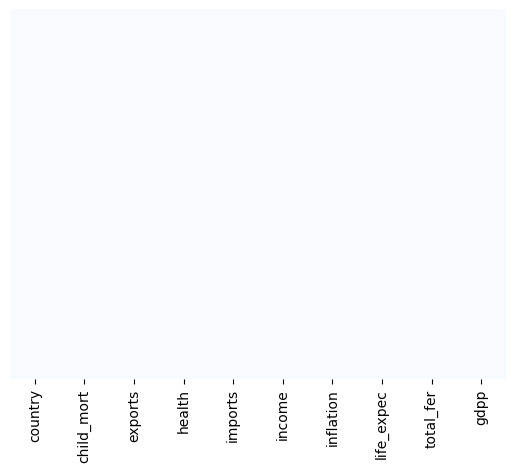

In [10]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [11]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


array([[<Axes: title={'center': 'child_mort'}>,
        <Axes: title={'center': 'exports'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'imports'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'inflation'}>],
       [<Axes: title={'center': 'life_expec'}>,
        <Axes: title={'center': 'total_fer'}>,
        <Axes: title={'center': 'gdpp'}>]], dtype=object)

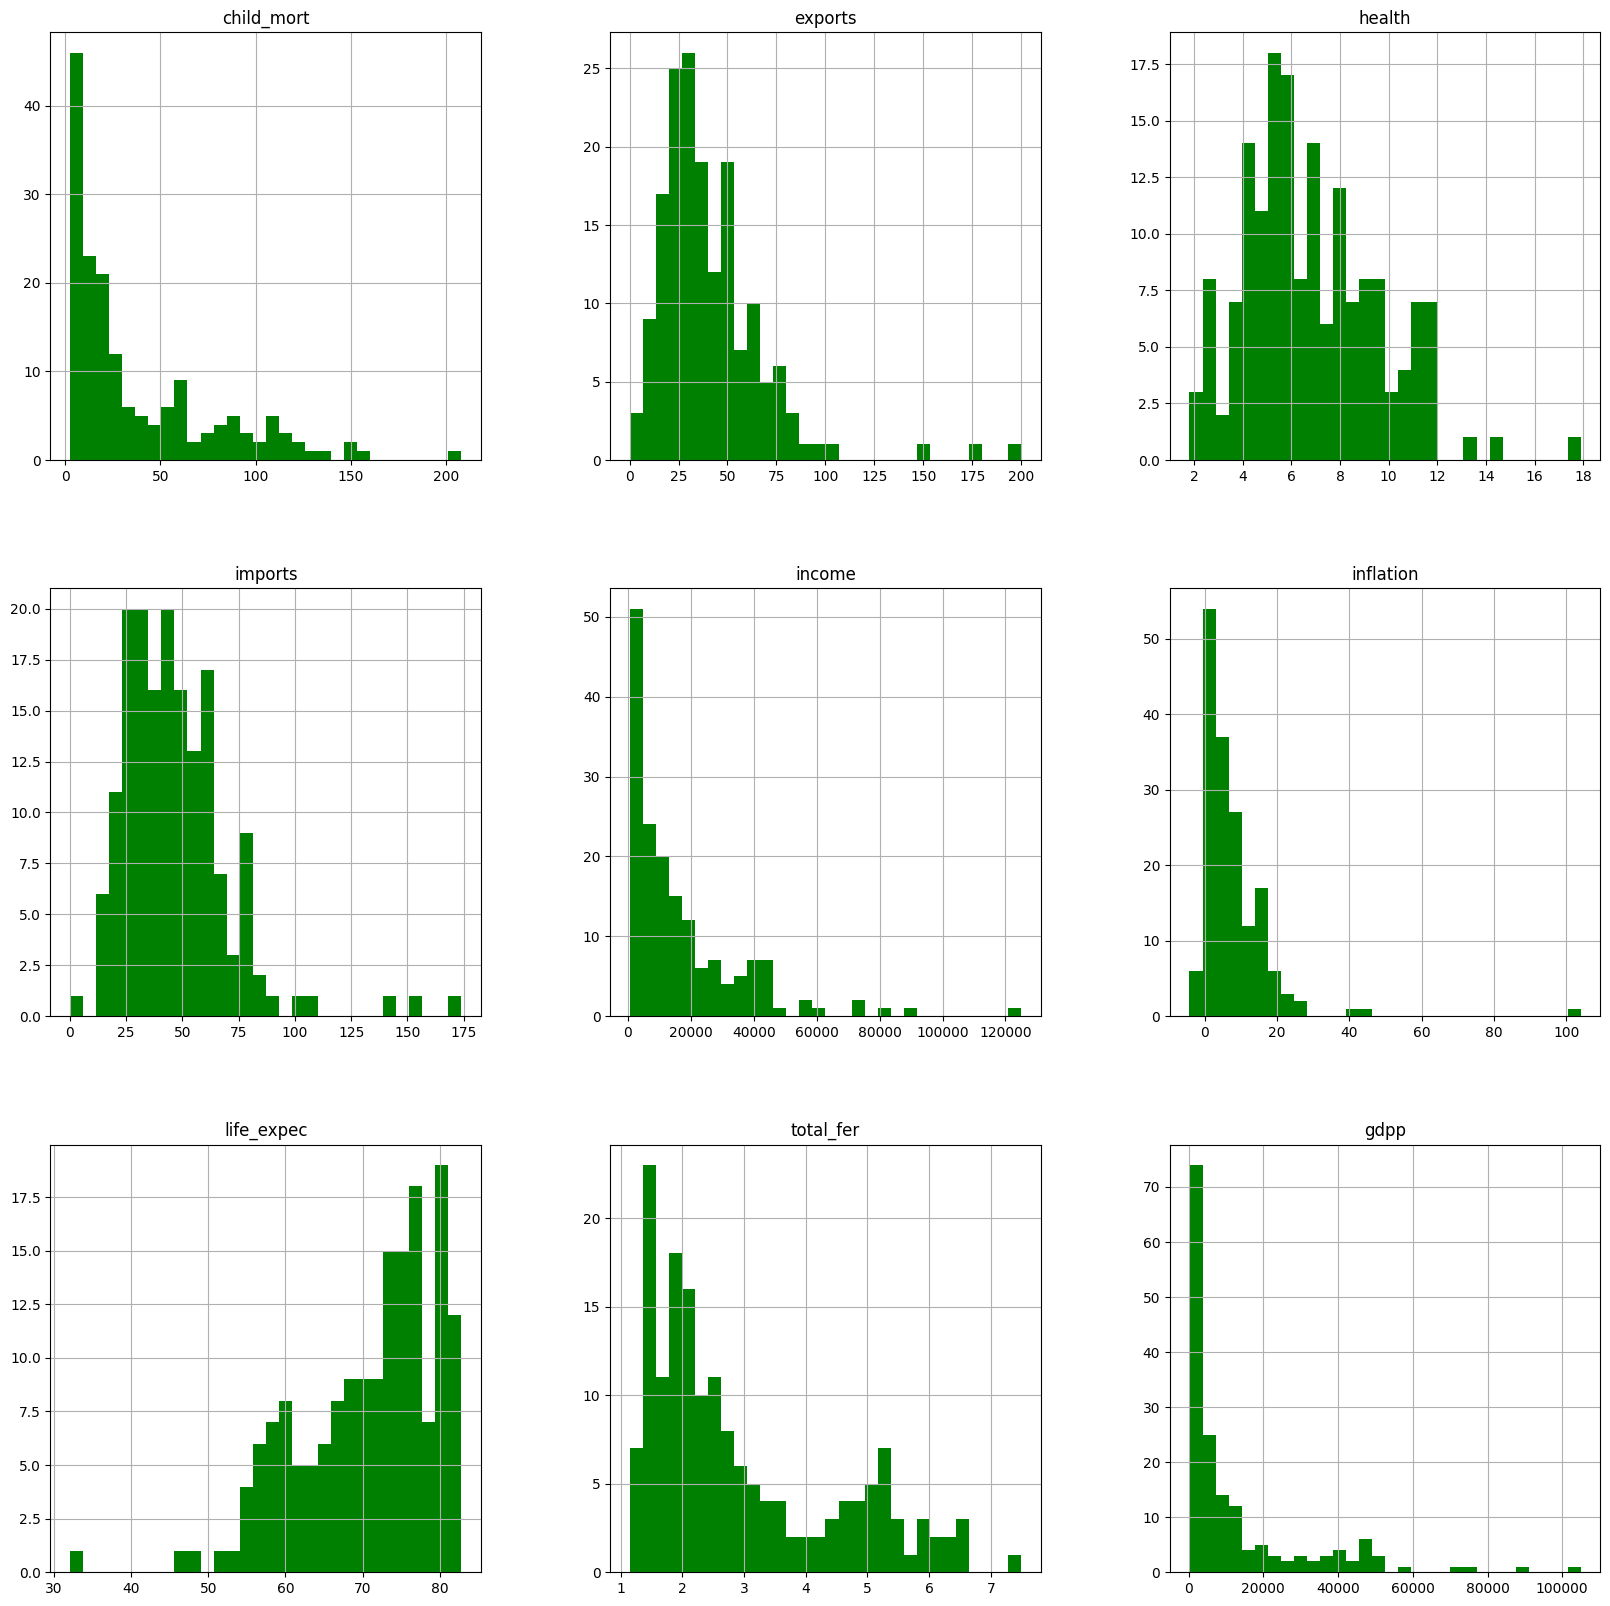

In [12]:
df.hist(bins = 30, figsize = (20,20), color = 'g')

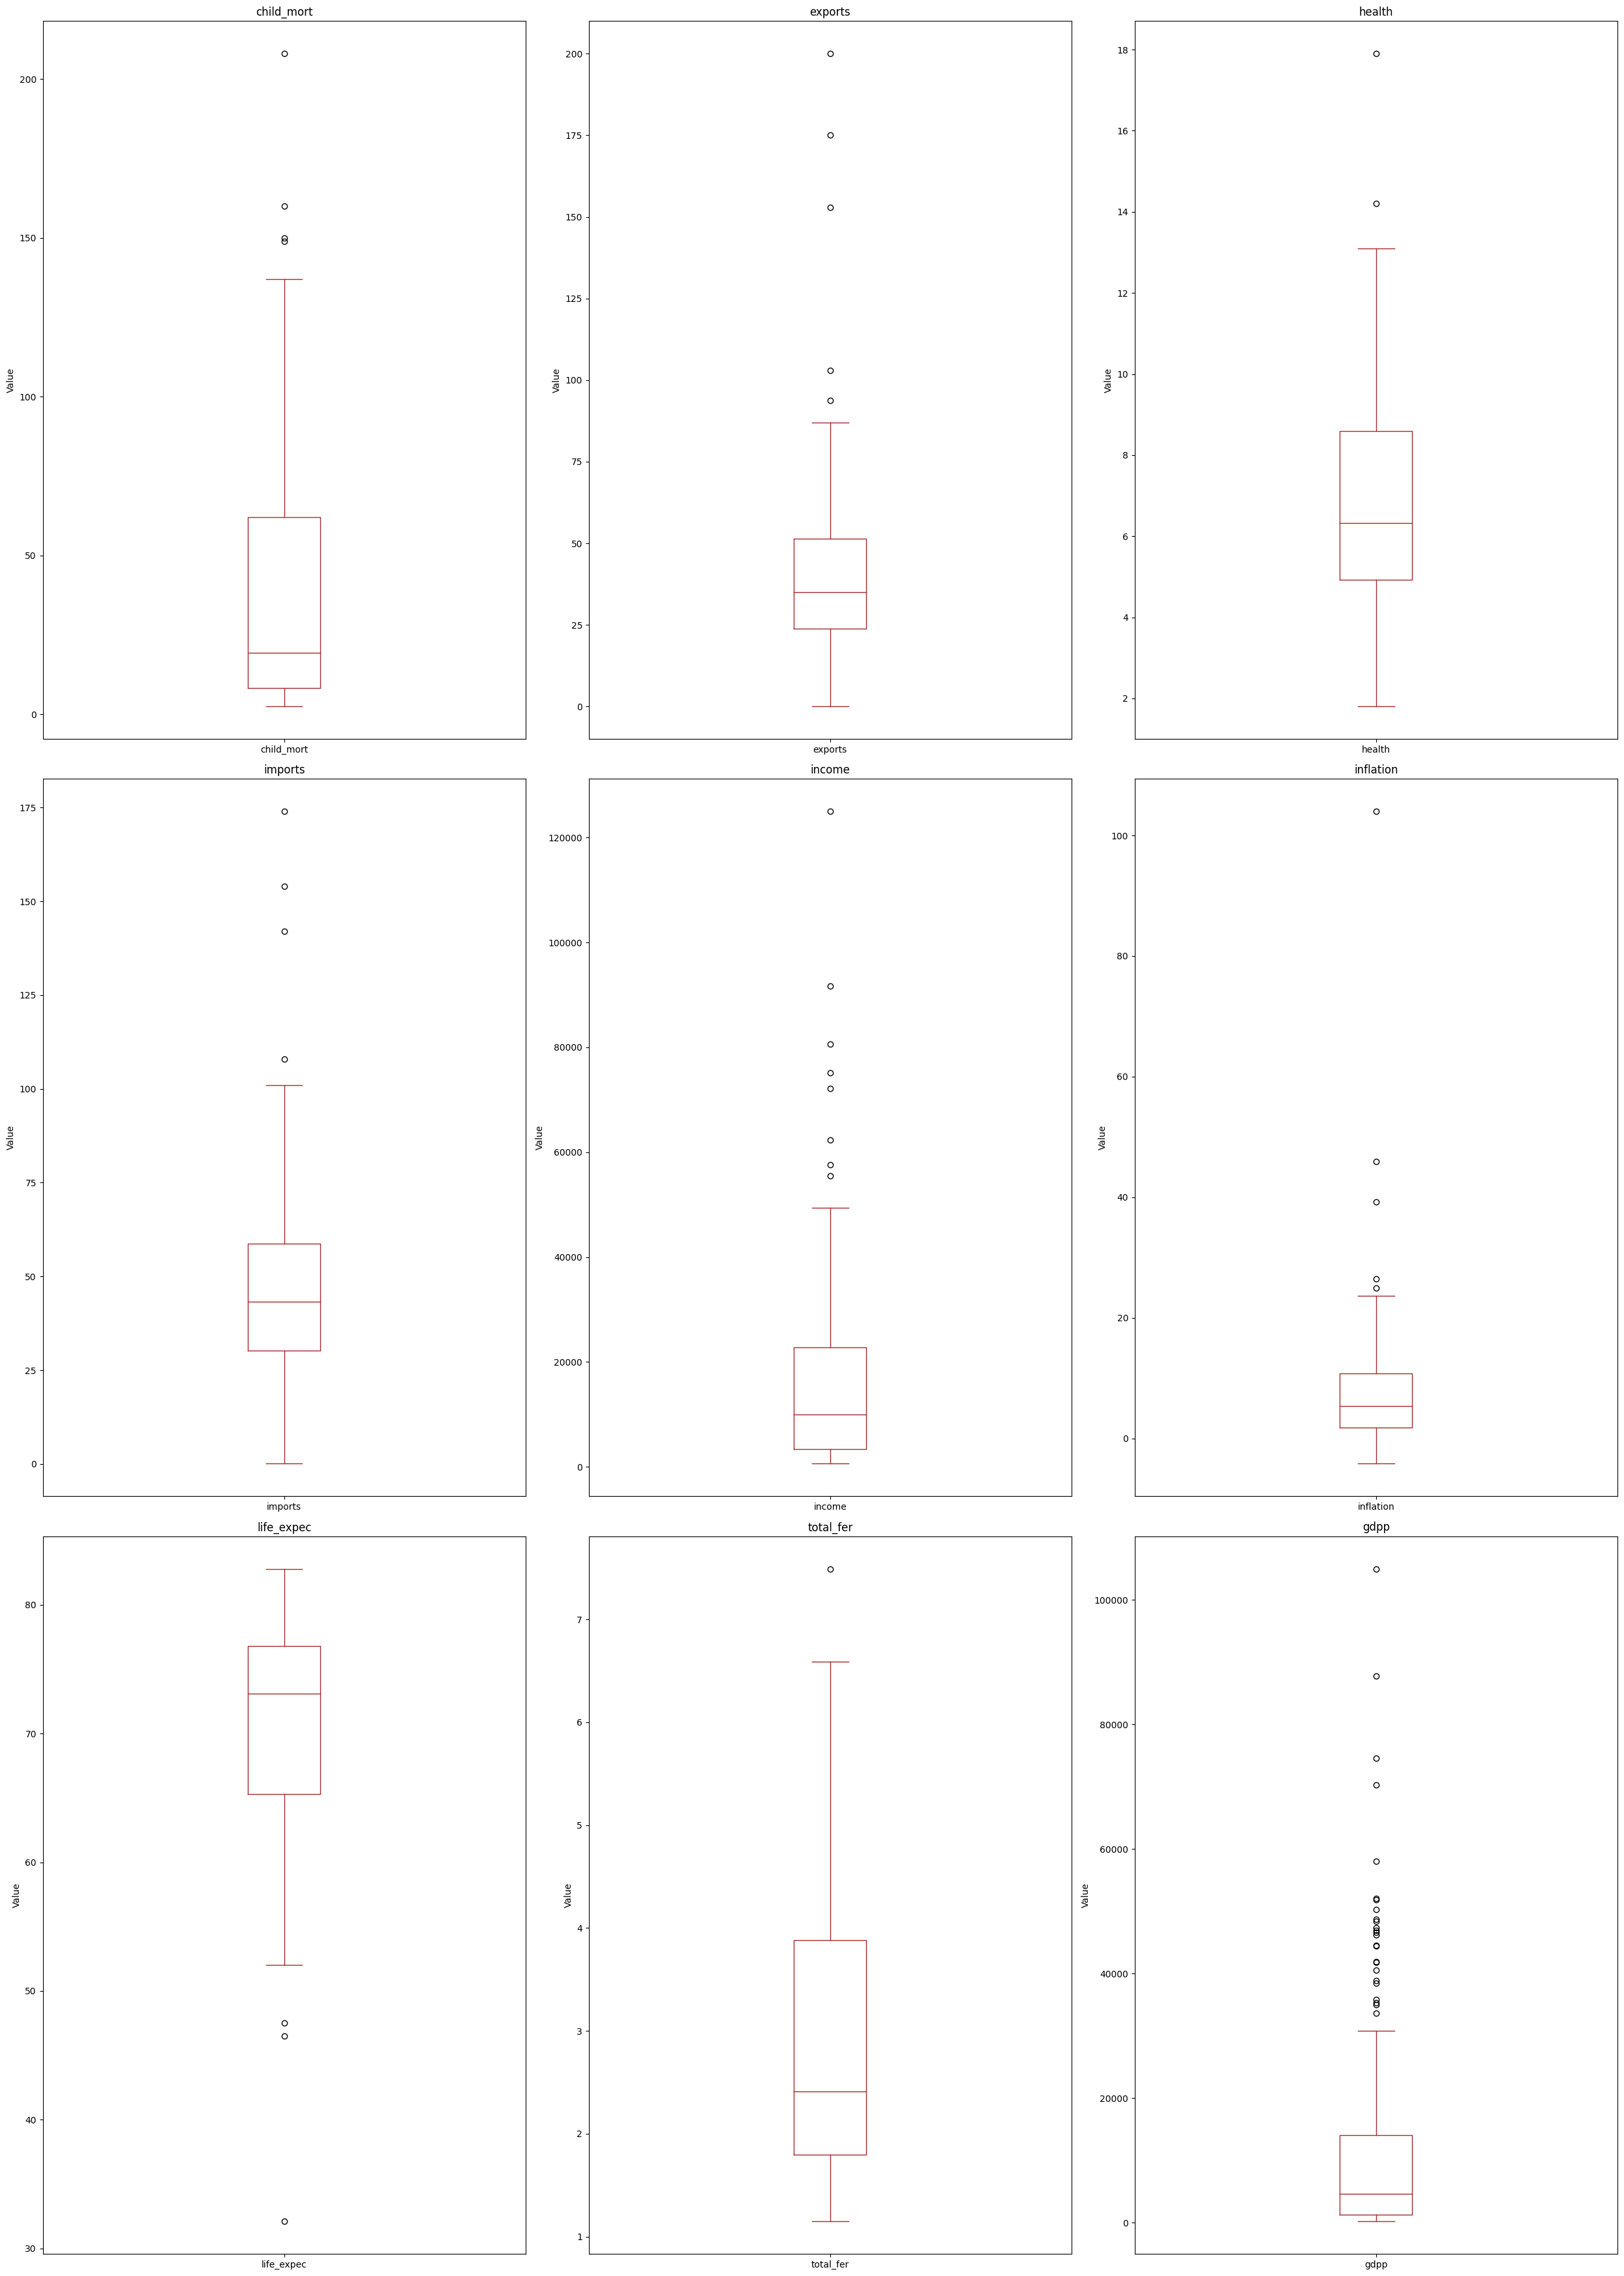

In [13]:
# Assuming df is your original DataFrame and you've already removed non-numeric columns like 'country'
df_numeric = df.drop(['country'], axis=1)

# Assuming df_numeric is your DataFrame with the numeric columns you want to plot
plt.figure(figsize=(25, 35))  # Set the overall figure size

# Creating a subplot for each numeric variable
for i, var in enumerate(df_numeric.columns):
    plt.subplot(3, 3, i + 1)  # Arrange the plots in a 3x3 grid or adjust based on the number of columns

    # Plotting a box plot
    df_numeric[var].plot(kind='box', ax=plt.gca(), color='brown')  # Using pandas plot function with kind='box'
    
    plt.title(var)  # Add a title for each subplot to clearly identify the variable being plotted
    plt.ylabel('Value')  # Set the y-axis label to show the values

plt.tight_layout()  # Adjust layout to avoid overlap of subplots
plt.show()


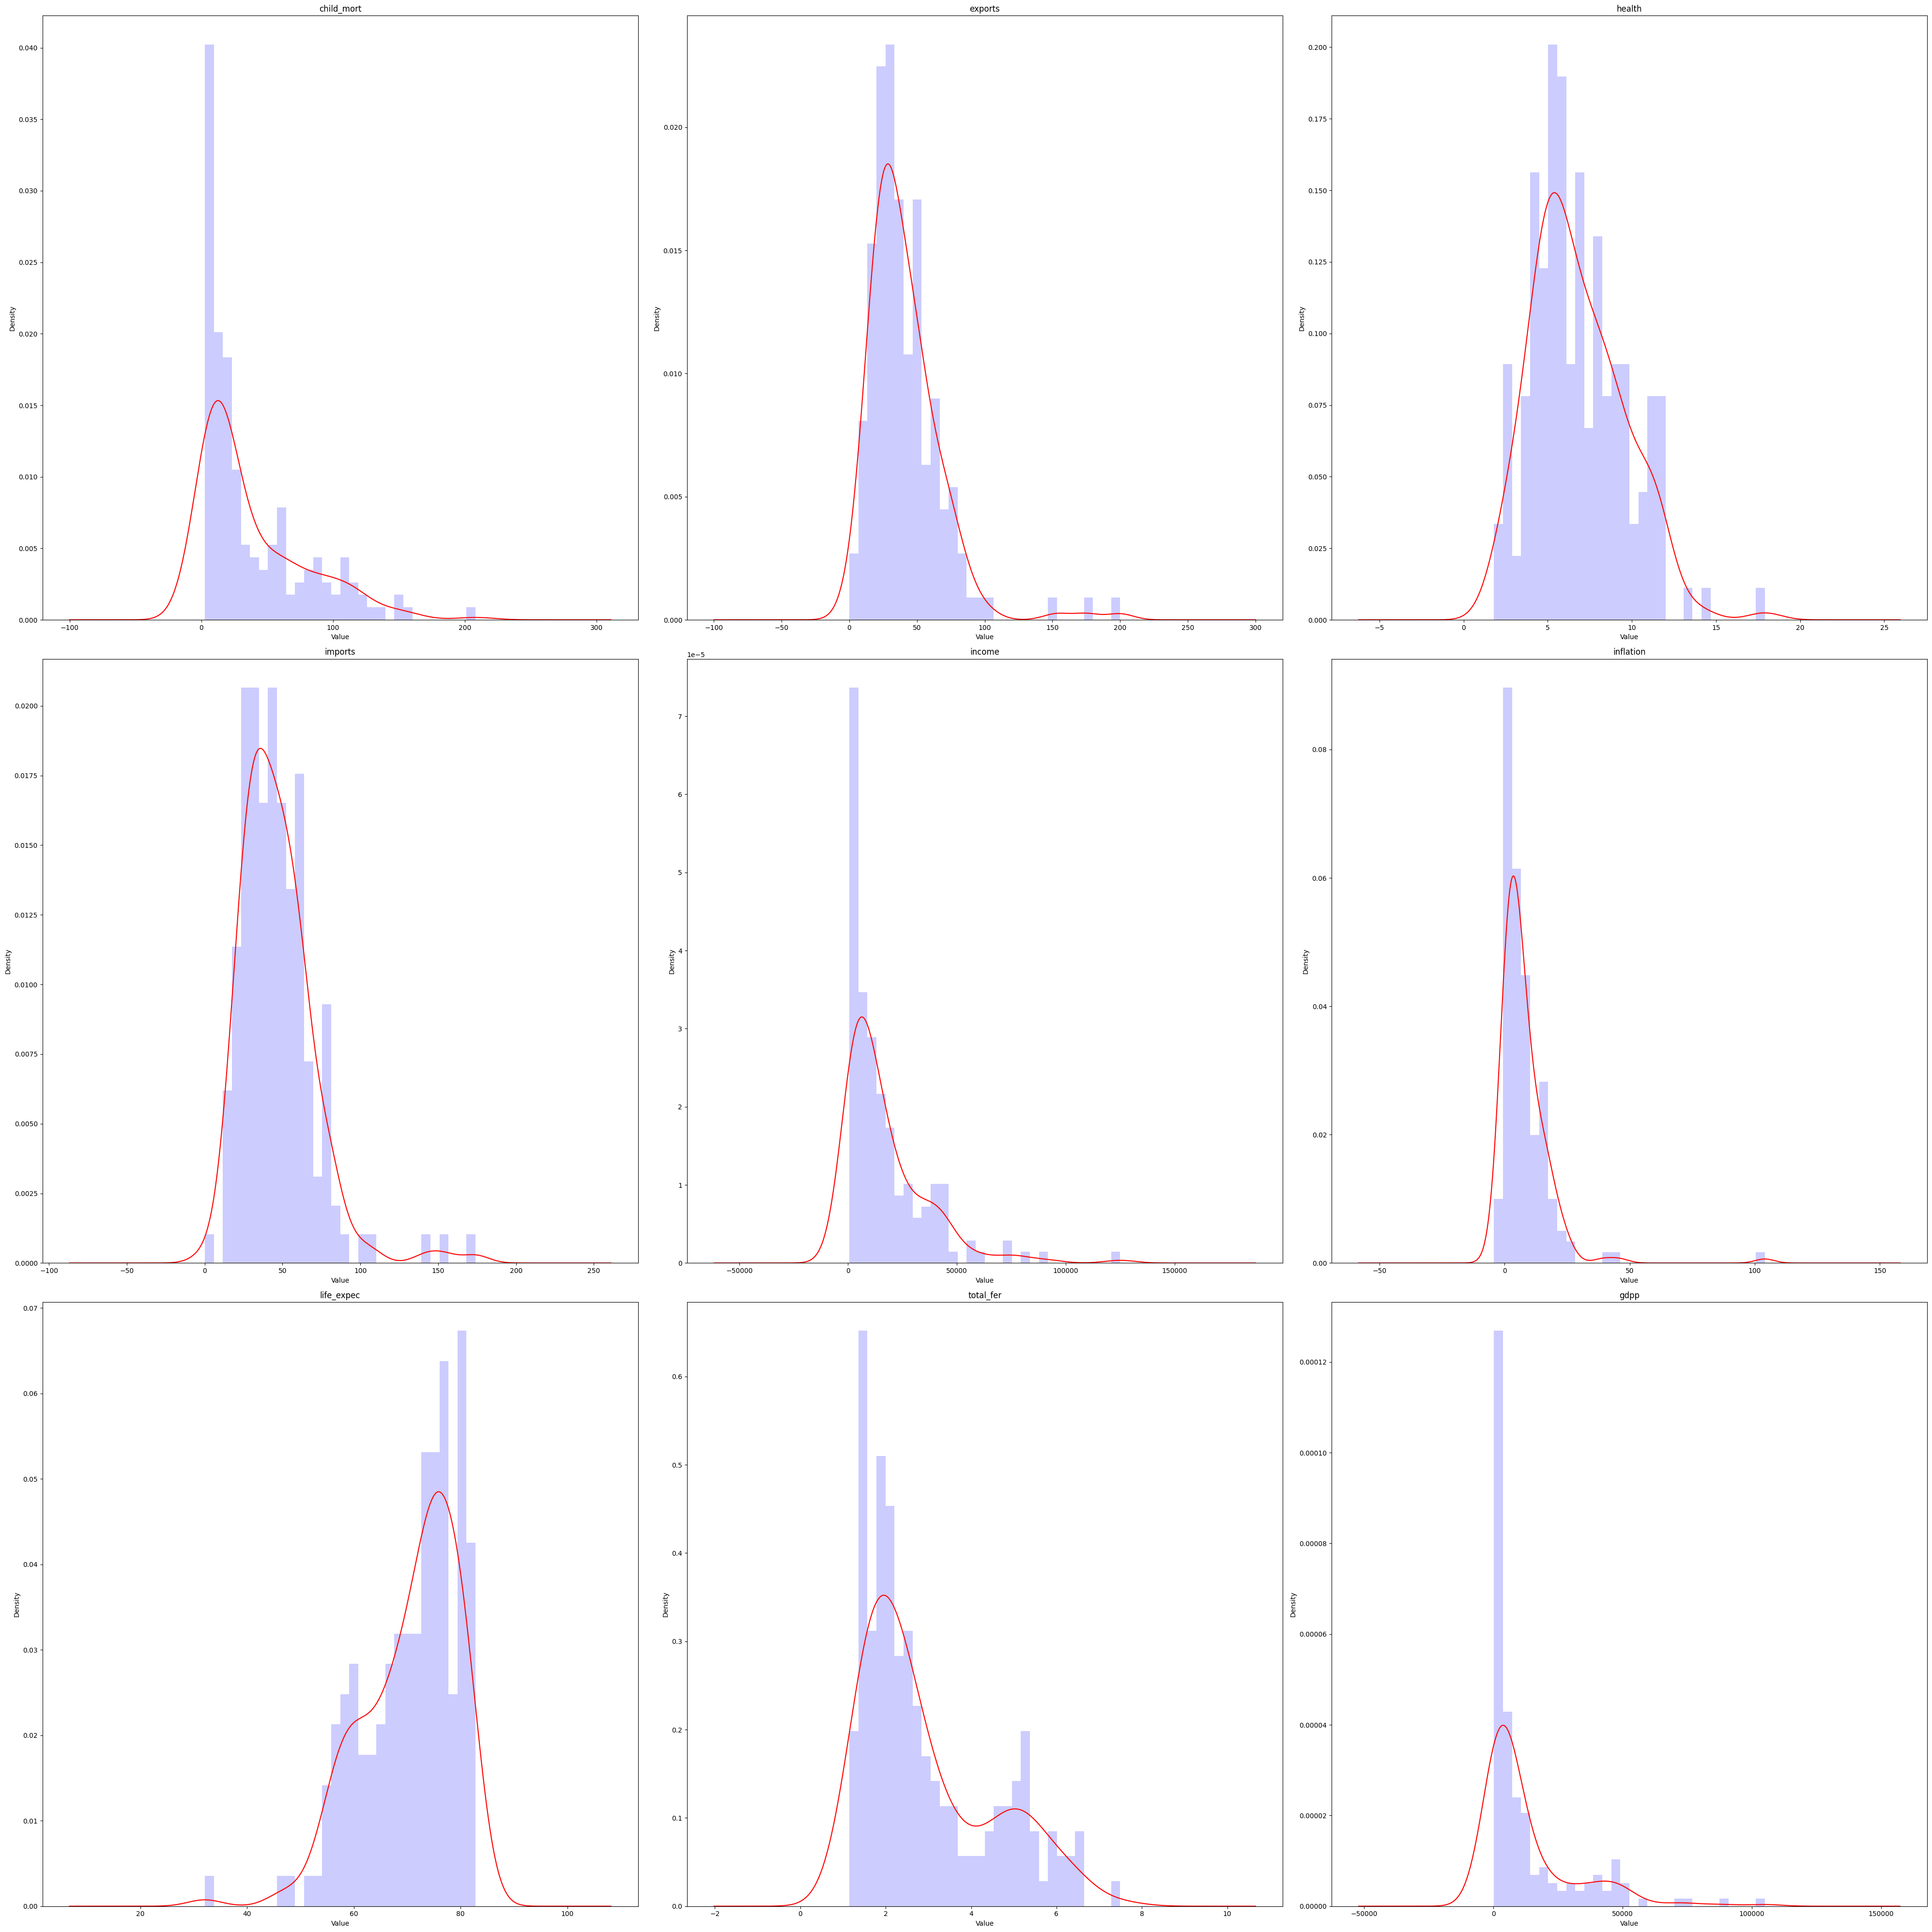

In [14]:
plt.figure(figsize=(40, 40))  # Set the overall figure size

# Creating a subplot for each numeric variable
for i, var in enumerate(df_numeric.columns):
    plt.subplot(3, 3, i + 1)  # Arrange the plots in a 3x3 grid
    
    # Plotting a histogram
    df_numeric[var].plot(kind='hist', density=True, alpha=0.2, ax=plt.gca(), color='blue', bins=30)  
    # 'density=True' normalizes the histogram so it forms a probability density, 
    # 'alpha' sets the transparency level, and 'bins' controls the number of bins
    
    # Overlaying a density plot
    df_numeric[var].plot(kind='density', ax=plt.gca(), color='red')  # 'color' sets different colors for differentiation
    
    plt.title(var)  # Add a title for each subplot
    plt.xlabel('Value')  # Set the x-axis label
    plt.ylabel('Density')  # Set the y-axis label

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [15]:
import plotly.express as px

variables = df_numeric.columns.to_list()

# Function to create a choropleth map
def create_choropleth(df, variable):
    fig = px.choropleth(
        df,
        locations='country',
        locationmode='country names',
        color=variable,
        hover_name='country',
        color_continuous_scale=px.colors.sequential.Plasma,
        title=f'Choropleth Map of {variable.capitalize()}'
    )
    fig.show()

In [16]:
# Create choropleth maps for each variable
for var in variables:
    create_choropleth(df, var)

##### Univariate Analysis Summary


1. **child_mort (Death of children under 5 years of age per 1000 live births)**:
   - The distribution of child mortality rates is heavily right-skewed.
   - Most countries have low child mortality rates, indicating better healthcare and living conditions.
   - The long tail to the right suggests that a few countries have significantly higher child mortality rates, which might indicate poorer healthcare systems or socio-economic challenges.

2. **exports (Exports of goods and services per capita as a % of GDP per capita)**:
   - The exports distribution is moderately right-skewed.
   - Many countries have low to moderate export percentages, indicating a smaller contribution of exports to their GDP.
   - There are fewer countries with high export percentages, potentially indicating strong export-oriented economies.

3. **health (Total health spending per capita as a % of GDP per capita)**:
   - Health spending distribution shows a right skew.
   - A significant number of countries have low health spending as a percentage of GDP, which might correlate with lower income or prioritization of other sectors.
   - Higher health spending percentages are less common but may indicate countries with advanced healthcare systems and higher GDP allocations to health.

4. **imports (Imports of goods and services per capita as a % of GDP per capita)**:
   - The imports distribution is similar to that of exports, showing right skewness.
   - Many countries have low to moderate import percentages, indicating less dependency on imported goods and services.
   - Countries with high import percentages may have economies that rely more on imported goods and services, which could affect their trade balance.

5. **Income (Net income per person)**:
   - The income distribution is highly right-skewed, with most countries having low to moderate net income per person.
   - The presence of high-income outliers suggests a disparity in income levels across different countries, with a few countries having significantly higher average incomes.

6. **Inflation (Annual growth rate of the Total GDP)**:
   - The inflation distribution is right-skewed with a concentration of countries experiencing low to moderate inflation rates.
   - The right tail indicates that a few countries experience high inflation rates, which could point to economic instability or rapidly growing economies.

7. **life_expec (Average number of years a newborn child would live)**:
   - The life expectancy distribution is moderately left-skewed.
   - Many countries have higher life expectancy rates, suggesting better living conditions and healthcare.
   - Lower life expectancy rates are less common but may indicate socio-economic challenges or poor healthcare systems in certain countries.

8. **total_fer (Total fertility rate, number of children born to each woman)**:
   - The fertility rate distribution is right-skewed.
   - Most countries have low to moderate fertility rates, which might be associated with higher income levels, better education, and access to family planning.
   - Higher fertility rates are less common and might be found in countries with lower income levels and less access to family planning resources.

9. **gdpp (GDP per capita)**:
   - The GDP per capita distribution is highly right-skewed, with most countries having low to moderate GDP per capita.
   - The long right tail indicates that a few countries have significantly higher GDP per capita, suggesting economic disparity.
   - Higher GDP per capita is associated with more developed and wealthier countries.

#### Bivariate Analysis

##### Visualization Techniques
1. **Scatter Plots**:
   - Scatter plots can be used to visualize the relationship between two continuous variables, such as `income` and `life_expec`.
   - Adding a trend line can help identify the nature of the relationship (e.g., linear, exponential).

2. **Pair Plot (Scatterplot Matrix)**:
   - A pair plot can be used to visualize the pairwise relationships between multiple variables. This is useful for getting an overall sense of the relationships in the dataset.

3. **Box Plots**:
   - Box plots can be used to compare the distribution of a continuous variable across different categories. For example, `income` (continuous) across different levels of `total_fer` (categorized).

4. **Heatmaps**:
   - A heatmap of the correlation matrix can show the strength and direction of relationships between variables. This helps in identifying highly correlated pairs of variables.

5. **Line Plots**:
   - Line plots can be useful for time series data or when you want to show trends between two variables, such as `inflation` over time if time data is available.

##### Statistical Techniques
1. **Correlation Analysis**:
   - Pearson Correlation: Measures linear correlation between two continuous variables.
   - Spearman Rank Correlation: Measures the strength and direction of association between two ranked variables.
   - Kendall Tau Correlation: Measures the association between two variables based on the ranks.

2. **Regression Analysis**:
   - Simple Linear Regression: Analyzes the linear relationship between two variables (one independent and one dependent).
   - Multiple Regression: Analyzes the relationship between one dependent variable and two or more independent variables.

3. **Chi-Square Test**:
   - This test can be used to determine if there is a significant association between two categorical variables.

4. **T-tests/ANOVA**:
   - T-tests can compare the means of a continuous variable across two categories.
   - ANOVA (Analysis of Variance) can compare the means of a continuous variable across multiple categories.

In [17]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


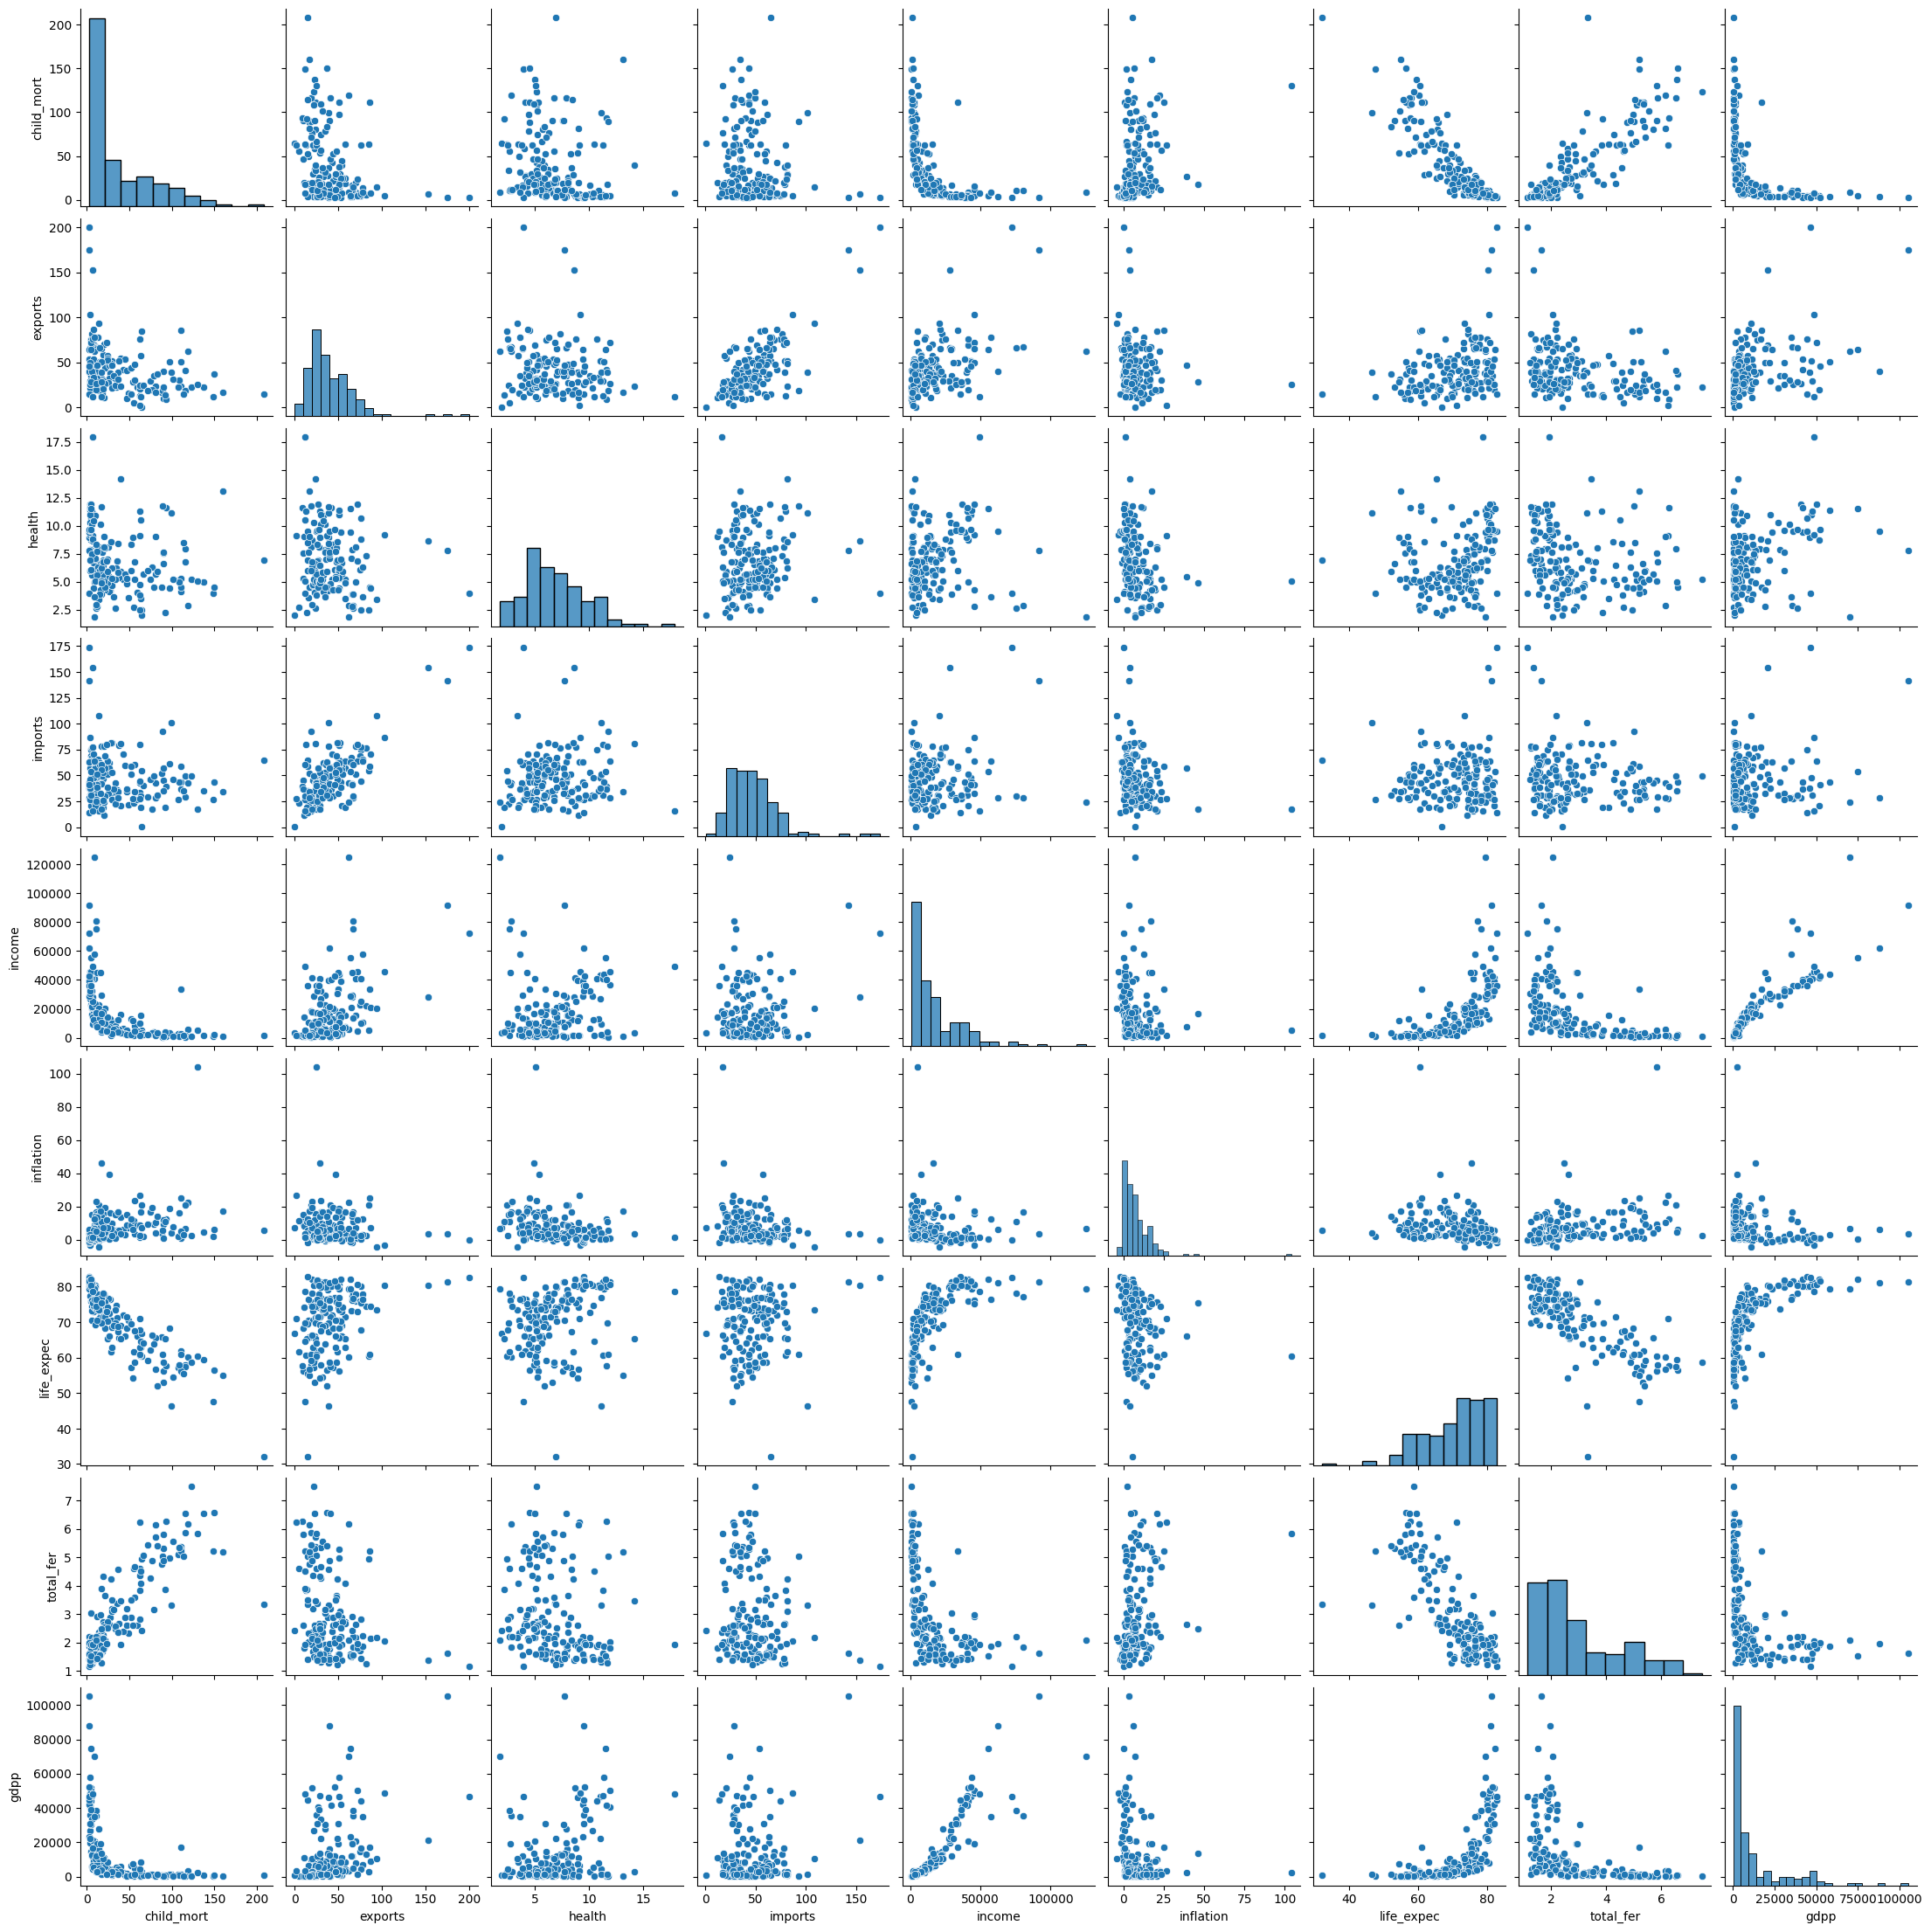

In [18]:
sns.pairplot(df_numeric)

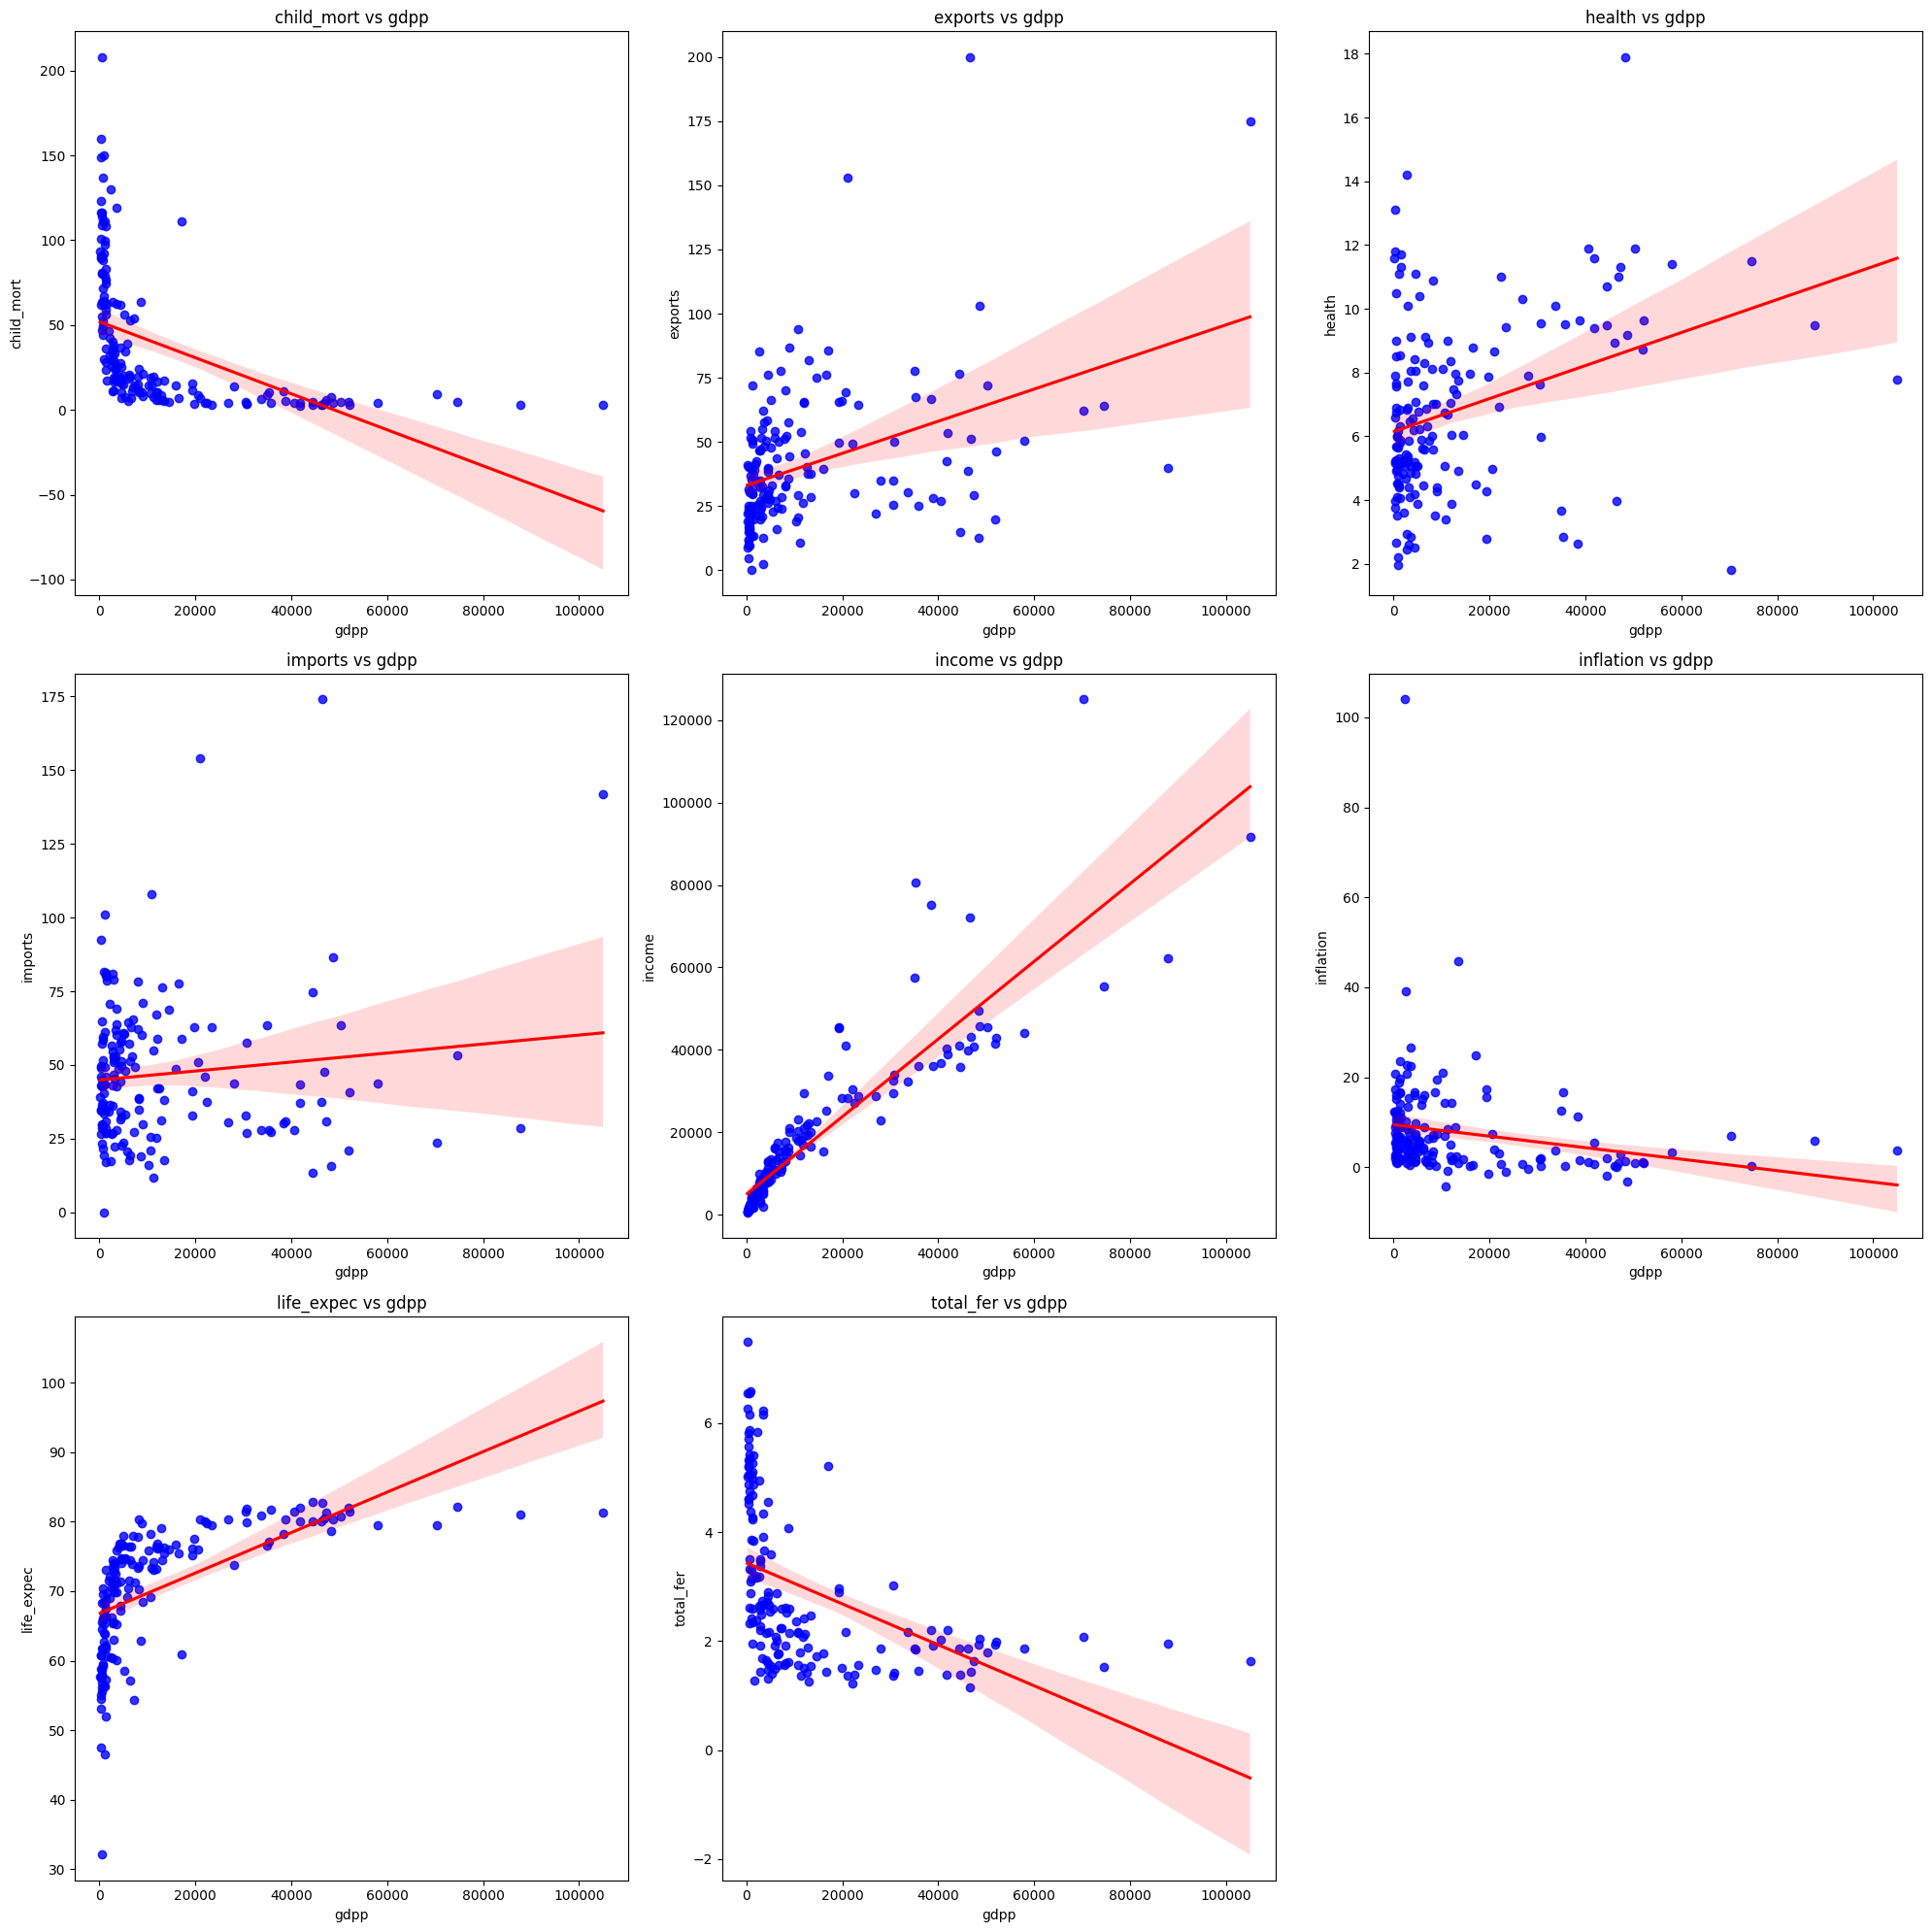

In [19]:
df_numeric_modified = df_numeric.drop(['gdpp'], axis = 1)

# Set the size of the plot
plt.figure(figsize=(20, 20))

# Loop through the variables and create scatter plots with regression lines
for i, var in enumerate(df_numeric_modified):
    plt.subplot(3, 3, i + 1)
    sns.regplot(x=df_numeric['gdpp'], y=df_numeric[var], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title(f'{var} vs gdpp')
    plt.xlabel('gdpp')
    plt.ylabel(var)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [20]:
df_log_transformed = df_numeric.copy()
for var in df_log_transformed.columns:
    df_log_transformed[var] = np.log1p(df_log_transformed[var])

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log1p



In [21]:
df_log_transformed.fillna(0)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,4.513055,2.397895,2.149434,3.826465,7.384610,2.345645,4.046554,1.919859,6.317165
1,2.867899,3.367296,2.021548,3.903991,9.203416,1.702928,4.347694,0.974560,8.316545
2,3.342862,3.673766,1.642873,3.478158,9.465060,2.839078,4.350278,1.358409,8.403128
3,4.787492,4.147885,1.348073,3.781914,8.682877,3.152736,4.112512,1.968510,8.169336
4,2.424803,3.839452,1.950187,4.092677,9.857496,0.891998,4.354141,1.141033,9.409273
...,...,...,...,...,...,...,...,...,...
162,3.407842,3.862833,1.832581,3.983413,7.989899,1.286474,4.158883,1.504077,7.996654
163,2.895912,3.384390,1.776646,2.923162,9.711176,3.848018,4.335983,1.244155,9.510519
164,3.190476,4.290459,2.059239,4.396915,8.409831,2.572612,4.305416,1.081805,7.178545
165,4.048301,3.433987,1.821318,3.566712,8.407602,3.202746,4.226834,1.735189,7.178545


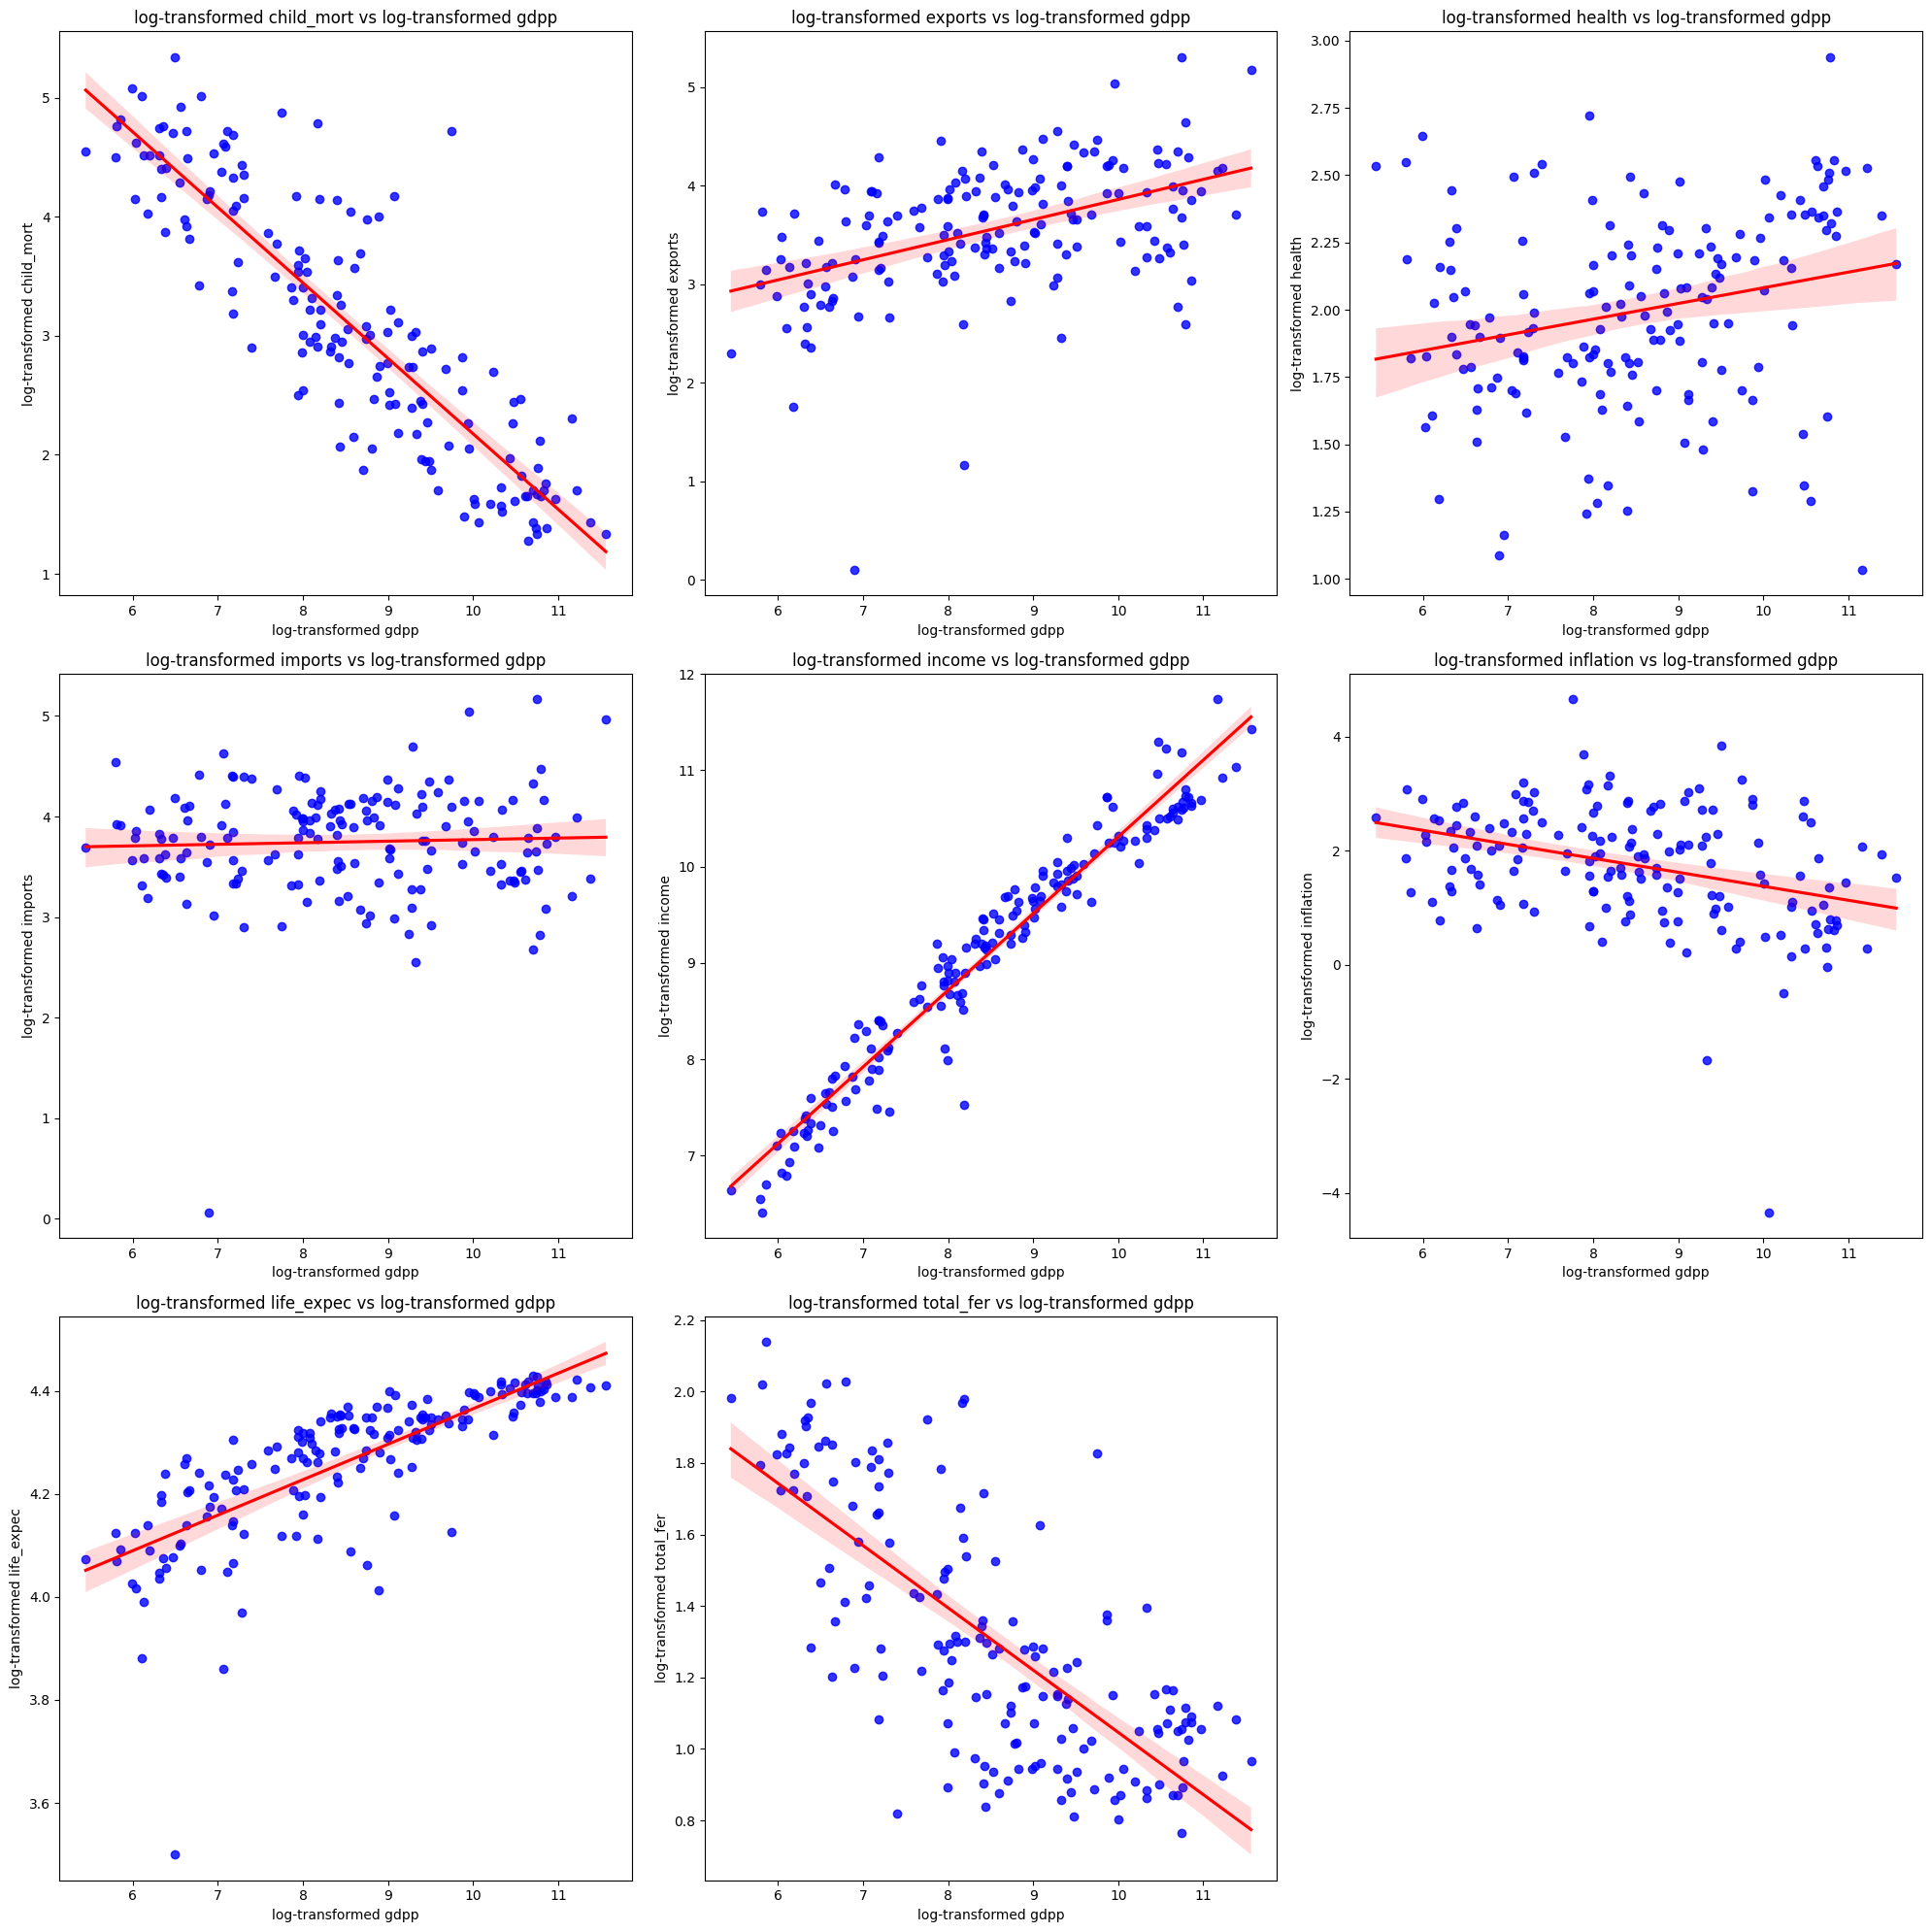

In [22]:
df_log_transformed_modifed = df_log_transformed.drop(['gdpp'], axis = 1)

# Set the size of the plot
plt.figure(figsize=(20, 20))

# Loop through the variables and create scatter plots with regression lines
for i, var in enumerate(df_log_transformed_modifed):
    plt.subplot(3, 3, i + 1)
    sns.regplot(x=df_log_transformed['gdpp'], y=df_log_transformed[var], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title(f'log-transformed {var} vs log-transformed gdpp')
    plt.xlabel('log-transformed gdpp')
    plt.ylabel(f'log-transformed {var}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

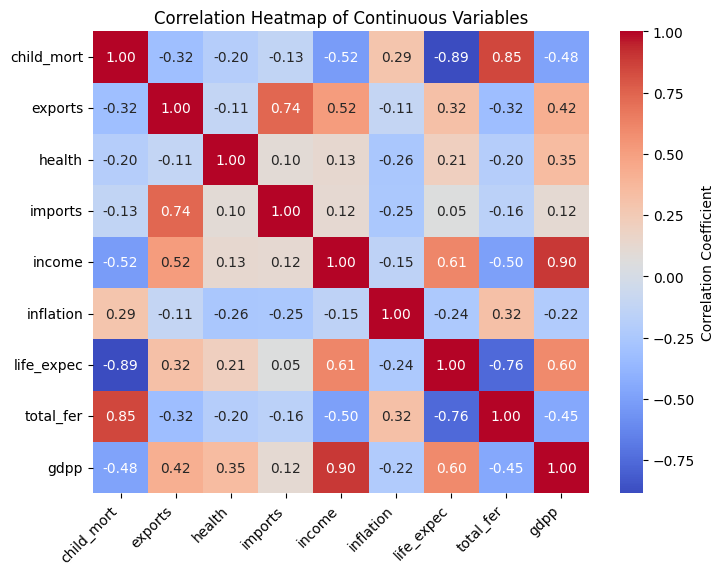

In [23]:
# Calculate the correlation matrix
correlations = df_numeric.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size to ensure the plot is not too cramped
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Continuous Variables')  # Add a title for clarity
plt.xticks(rotation=45, ha = 'right')  # Rotate the x-axis labels for better readability
plt.yticks(rotation=0)  # Ensure the y-axis labels are horizontal for clarity
plt.show()

##### Bivariate Analysis

1. **log_child_mort vs log_gdpp**:
   - There is a strong negative correlation between the log of child mortality rates and the log of GDP per capita.
   - As log-transformed `gdpp` increases, log-transformed `child_mort` decreases significantly. This indicates that higher GDP per capita is associated with lower child mortality rates, likely due to better healthcare and living conditions.

2. **log_exports vs log_gdpp**:
   - There is a positive correlation between the log of exports (as a percentage of GDP) and the log of GDP per capita.
   - Countries with higher export percentages (log-transformed) tend to have higher GDP per capita (log-transformed). This suggests that export-oriented economies may achieve higher economic growth.

3. **log_health vs log_gdpp**:
   - There is a positive correlation between the log of health spending (as a percentage of GDP) and the log of GDP per capita.
   - Countries that spend more on health (log-transformed) tend to have higher GDP per capita (log-transformed). This indicates that investment in healthcare can be associated with higher economic productivity and better overall economic performance.

4. **log_imports vs log_gdpp**:
   - There is a weak positive correlation between the log of imports (as a percentage of GDP) and the log of GDP per capita.
   - While the trend line indicates a slight positive relationship, the data points are widely scattered. This suggests that the relationship between imports and GDP per capita is not as strong as some other variables.

5. **log_income vs log_gdpp**:
   - There is a strong positive correlation between the log of net income per person and the log of GDP per capita.
   - Higher income levels (log-transformed) are strongly associated with higher GDP per capita (log-transformed), which is expected as income is a component of GDP.

6. **log_inflation vs log_gdpp**:
   - There is a weak negative correlation between the log of inflation rates and the log of GDP per capita.
   - While there is a downward trend, the relationship is not very strong, indicating that other factors might be influencing GDP per capita alongside inflation rates.

7. **log_life_expec vs log_gdpp**:
   - There is a strong positive correlation between the log of life expectancy and the log of GDP per capita.
   - Countries with higher GDP per capita (log-transformed) tend to have higher life expectancy (log-transformed). This suggests that better economic conditions contribute to improved health and longer life spans.

8. **log_total_fer vs log_gdpp**:
   - There is a negative correlation between the log of total fertility rate and the log of GDP per capita.
   - Higher GDP per capita (log-transformed) is associated with lower fertility rates (log-transformed). This could indicate that in wealthier countries, families tend to have fewer children, possibly due to higher living costs and better access to family planning resources.

### Machine Learning

#### K-Means

[Info](https://www.geeksforgeeks.org/k-means-clustering-introduction/)

![K-means](Images/K-means_img1.png)

![K-means](Images/K-means_img2.png)

![K-means](Images/K-means_img3.png)

![K-means](Images/K-means_img4.png)

![K-means](Images/K-means_img5.png)

![K-means](Images/K-means_img6.png)

![K-means](Images/K-means_img7.png)

![K-means](Images/K-means_img8.png)

##### Elbow Method

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [24]:
from sklearn.preprocessing import StandardScaler
# Let's scale the data first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [25]:
df_scaled.shape

(167, 9)

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/miniconda3/envs/DSProjects/lib/python3.

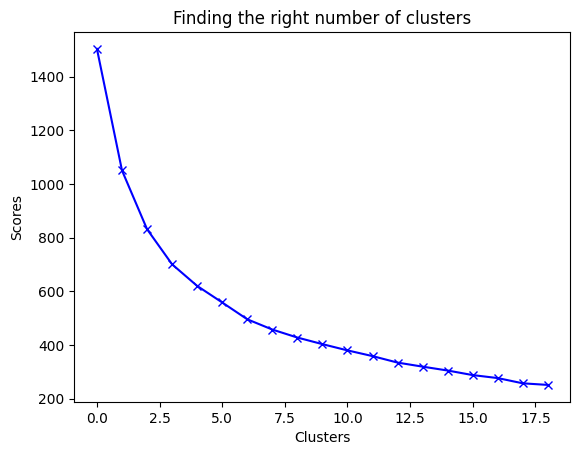

'\nkmeans.inertia_ is an attribute of the KMeans object from the scikit-learn library, and it measures the sum of squared distances of samples to their closest cluster center, also known as the within-cluster sum of squares (WCSS).\n\nIn other words, inertia_ quantifies how well the clustering algorithm has grouped the data points. Lower values of inertia are better, as they indicate that the data points are closer to their respective cluster centers, implying more compact clusters.\n'

In [26]:
from sklearn.cluster import KMeans

scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i, random_state=42)
  kmeans.fit(df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

"""
kmeans.inertia_ is an attribute of the KMeans object from the scikit-learn library, and it measures the sum of squared distances of samples to their closest cluster center, also known as the within-cluster sum of squares (WCSS).

In other words, inertia_ quantifies how well the clustering algorithm has grouped the data points. Lower values of inertia are better, as they indicate that the data points are closer to their respective cluster centers, implying more compact clusters.
"""

We will choose 3 as our optimal K-value

In [27]:
kmeans = KMeans(3, random_state=42)
kmeans.fit(df_scaled)
labels = kmeans.labels_

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [28]:
kmeans.cluster_centers_.shape

(3, 9)

In [29]:

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_numeric.columns])
cluster_centers           

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.827449,0.645080,0.727411,0.190639,1.484243,-0.484921,1.079579,-0.791877,1.615995
1,1.360218,-0.437533,-0.155984,-0.189204,-0.686894,0.402111,-1.282180,1.364944,-0.604242
2,-0.406453,-0.031653,-0.224471,0.024162,-0.251770,-0.017167,0.254734,-0.424343,-0.354481


In [30]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_numeric.columns])
cluster_centers

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381


In [31]:
labels.shape 

(167,)

In [32]:
labels.max()

2

In [33]:
labels.min()

0

In [34]:
y_kmeans = kmeans.fit_predict(df_numeric)
y_kmeans

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [35]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df_numeric, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


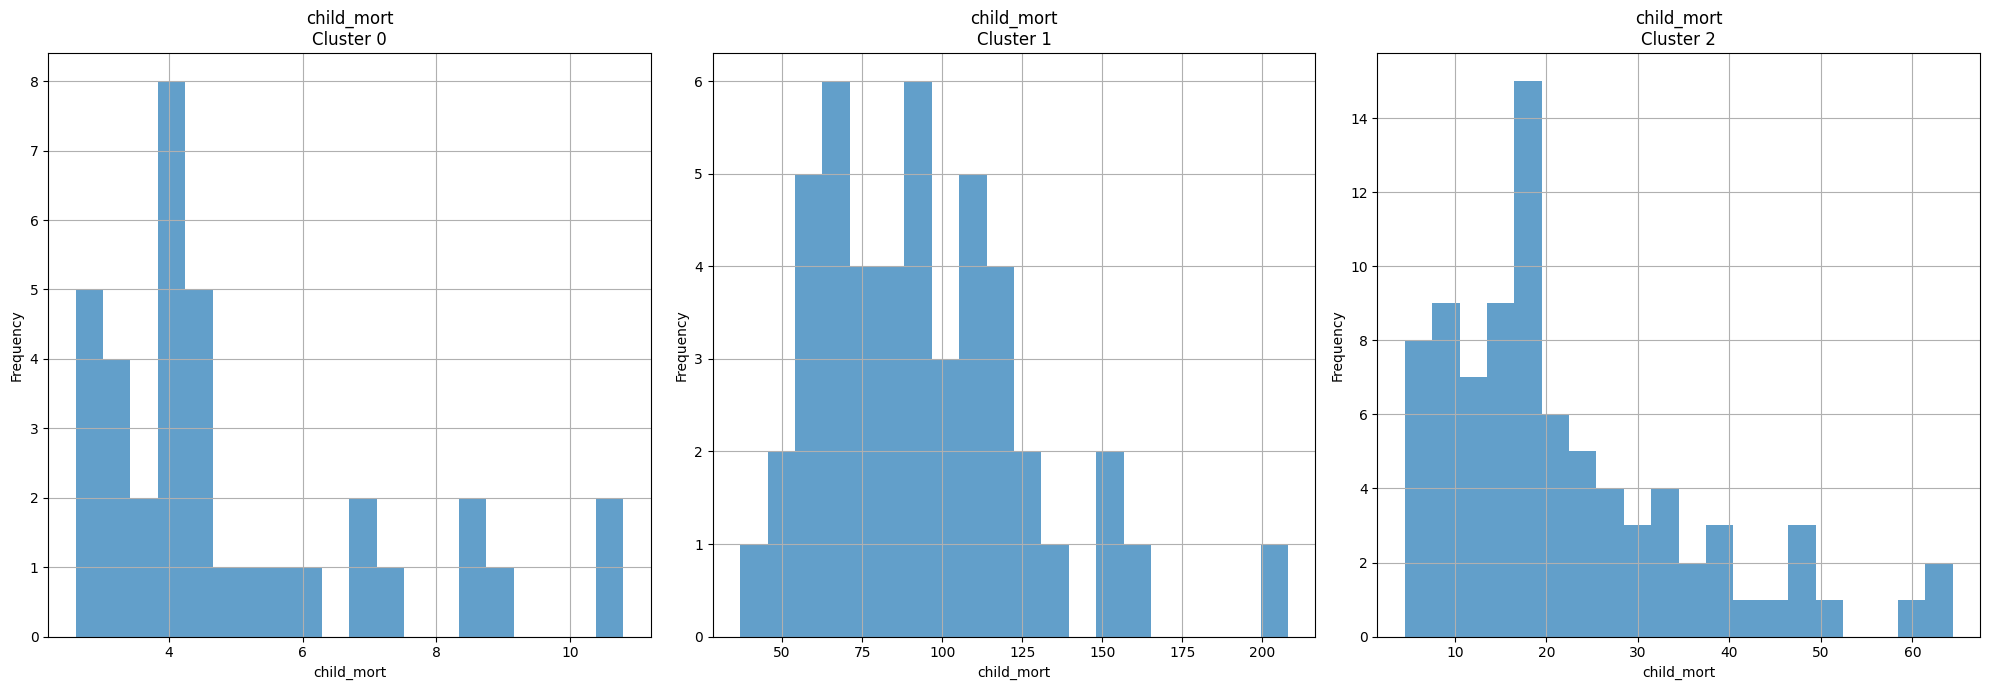

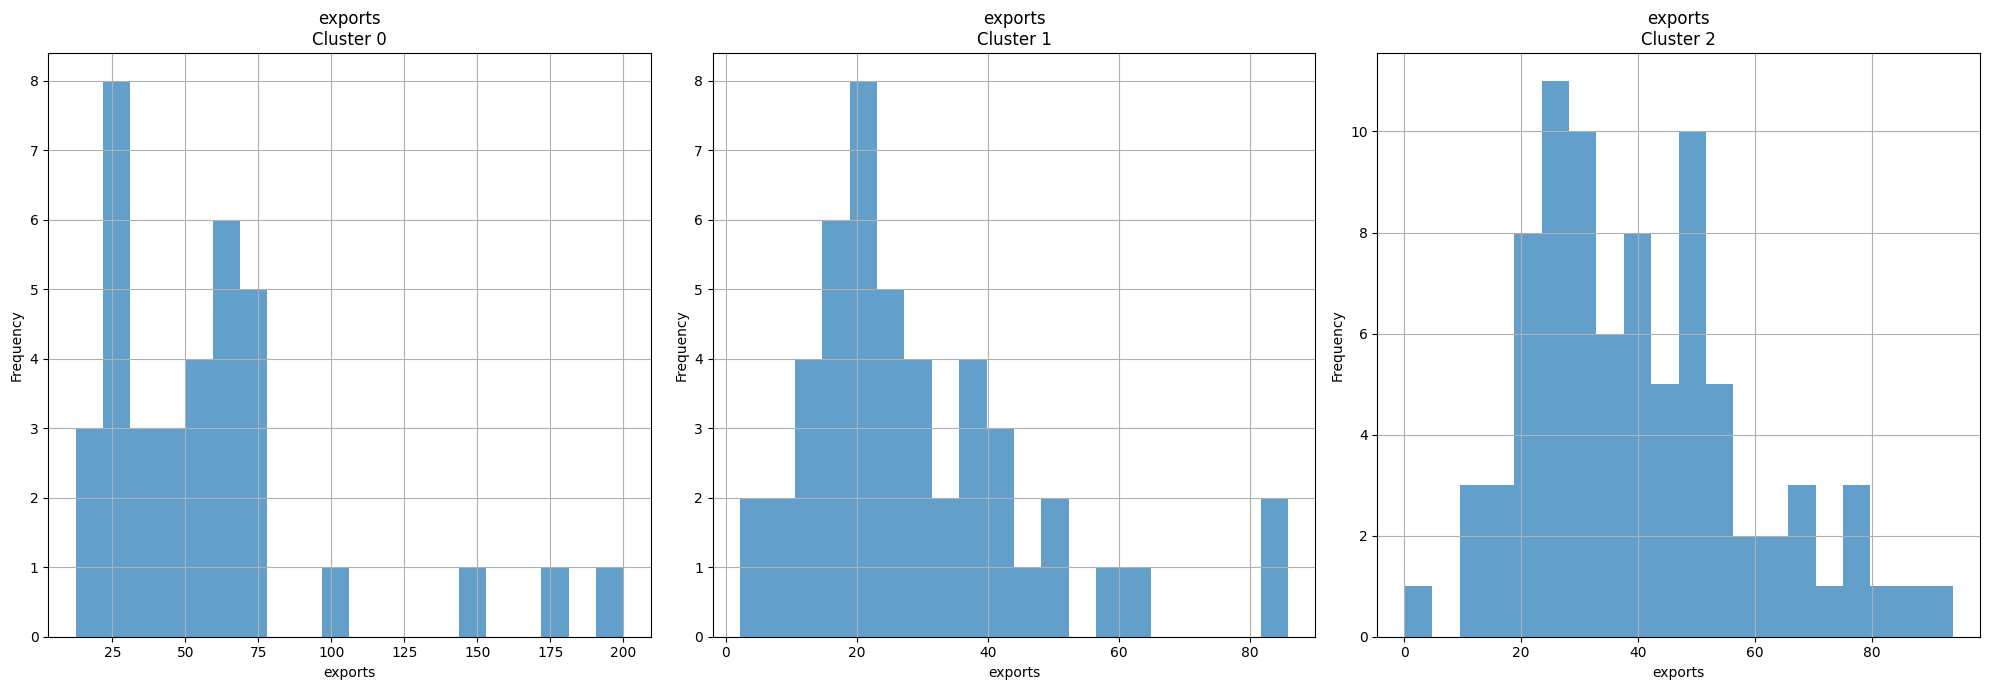

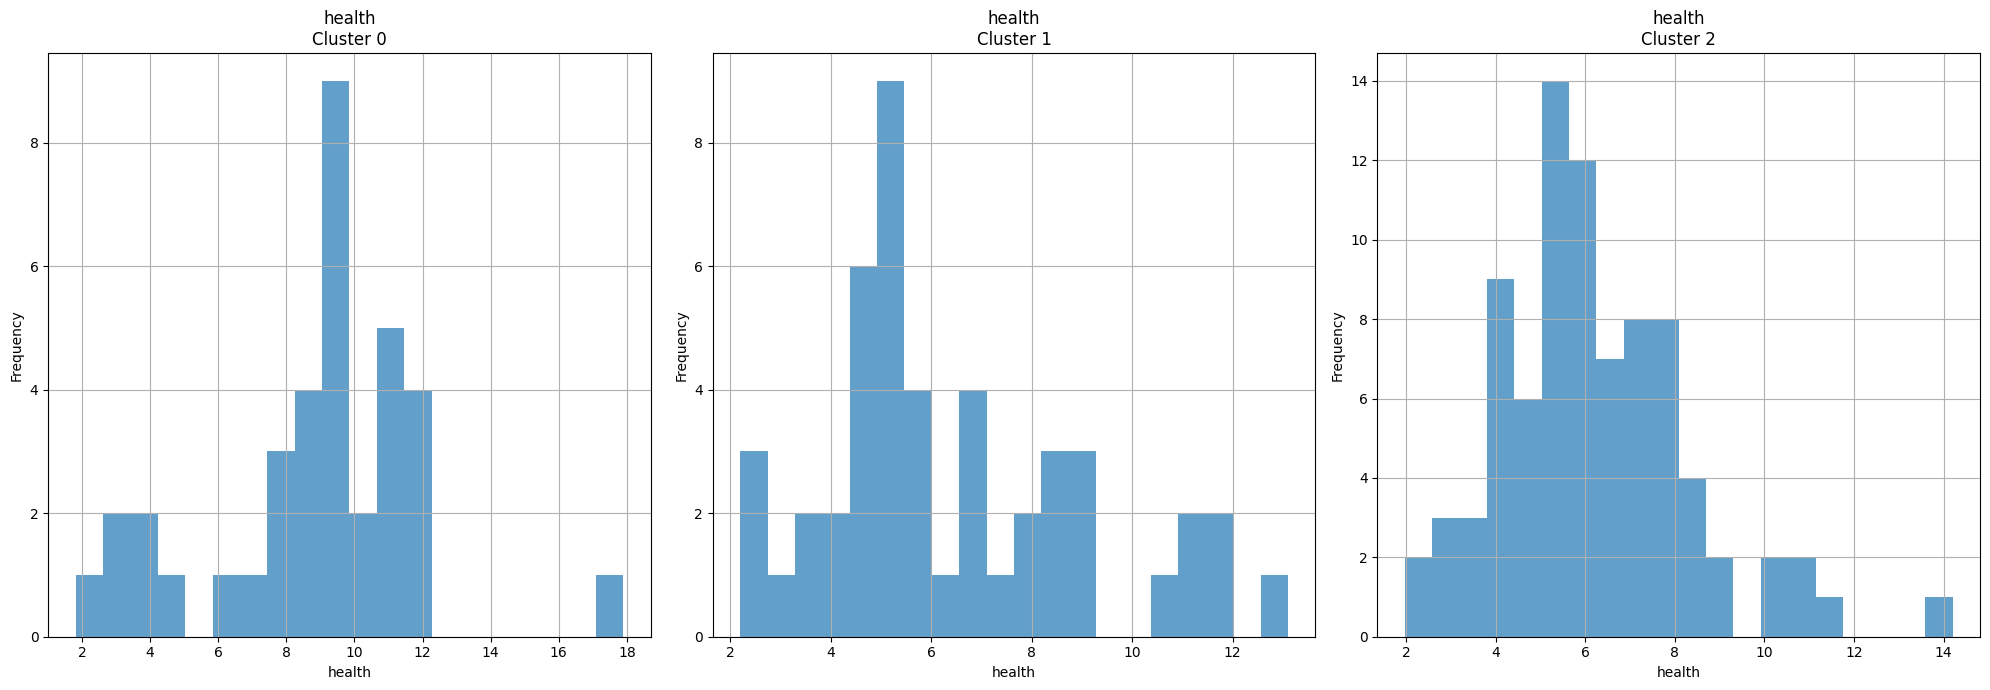

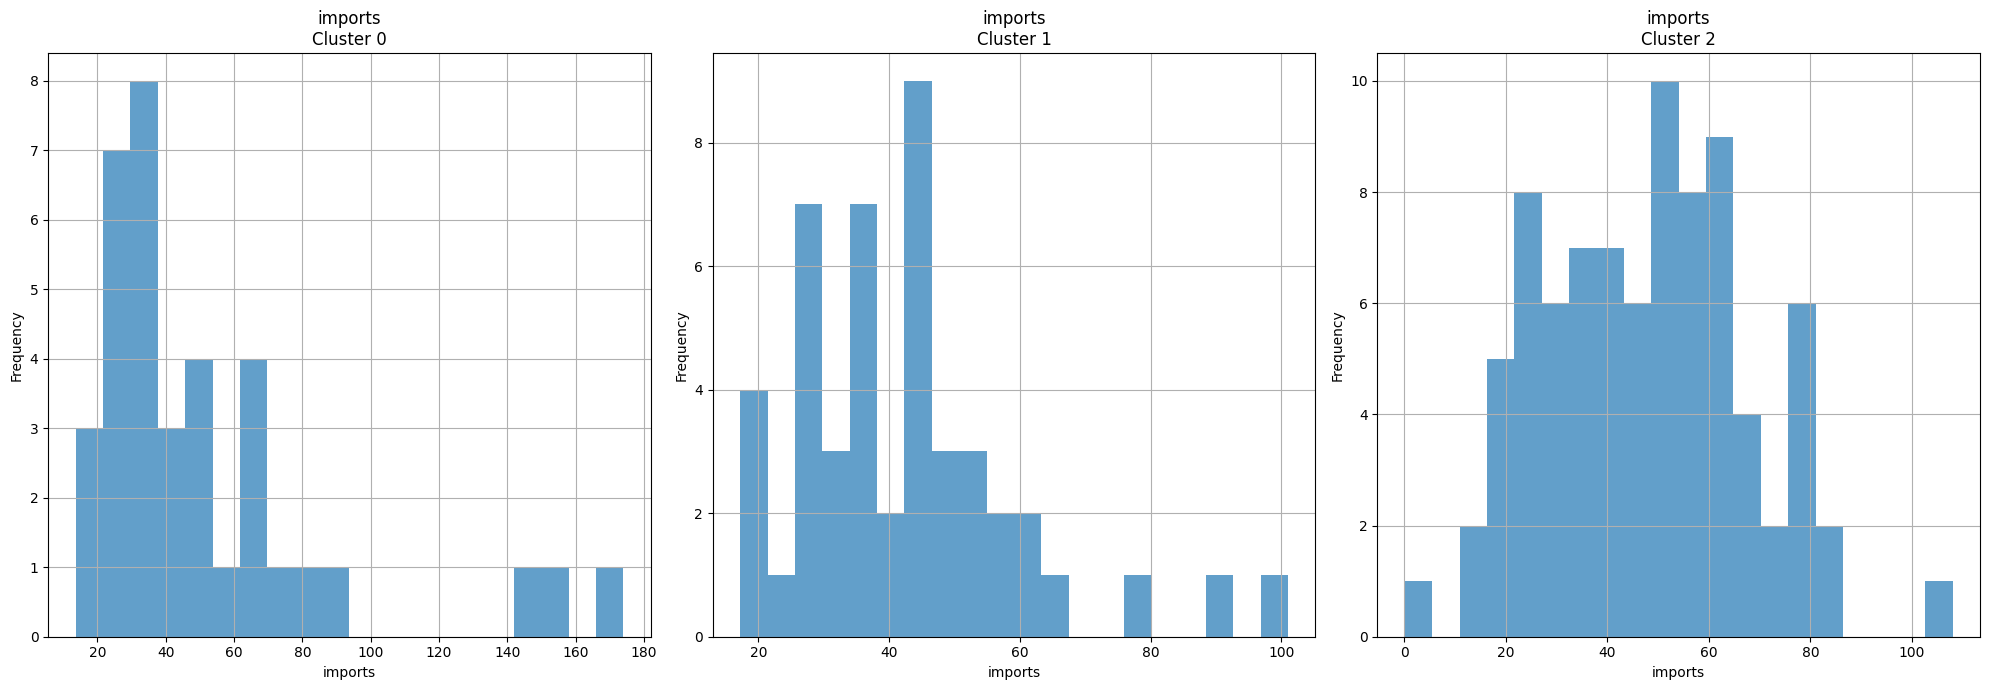

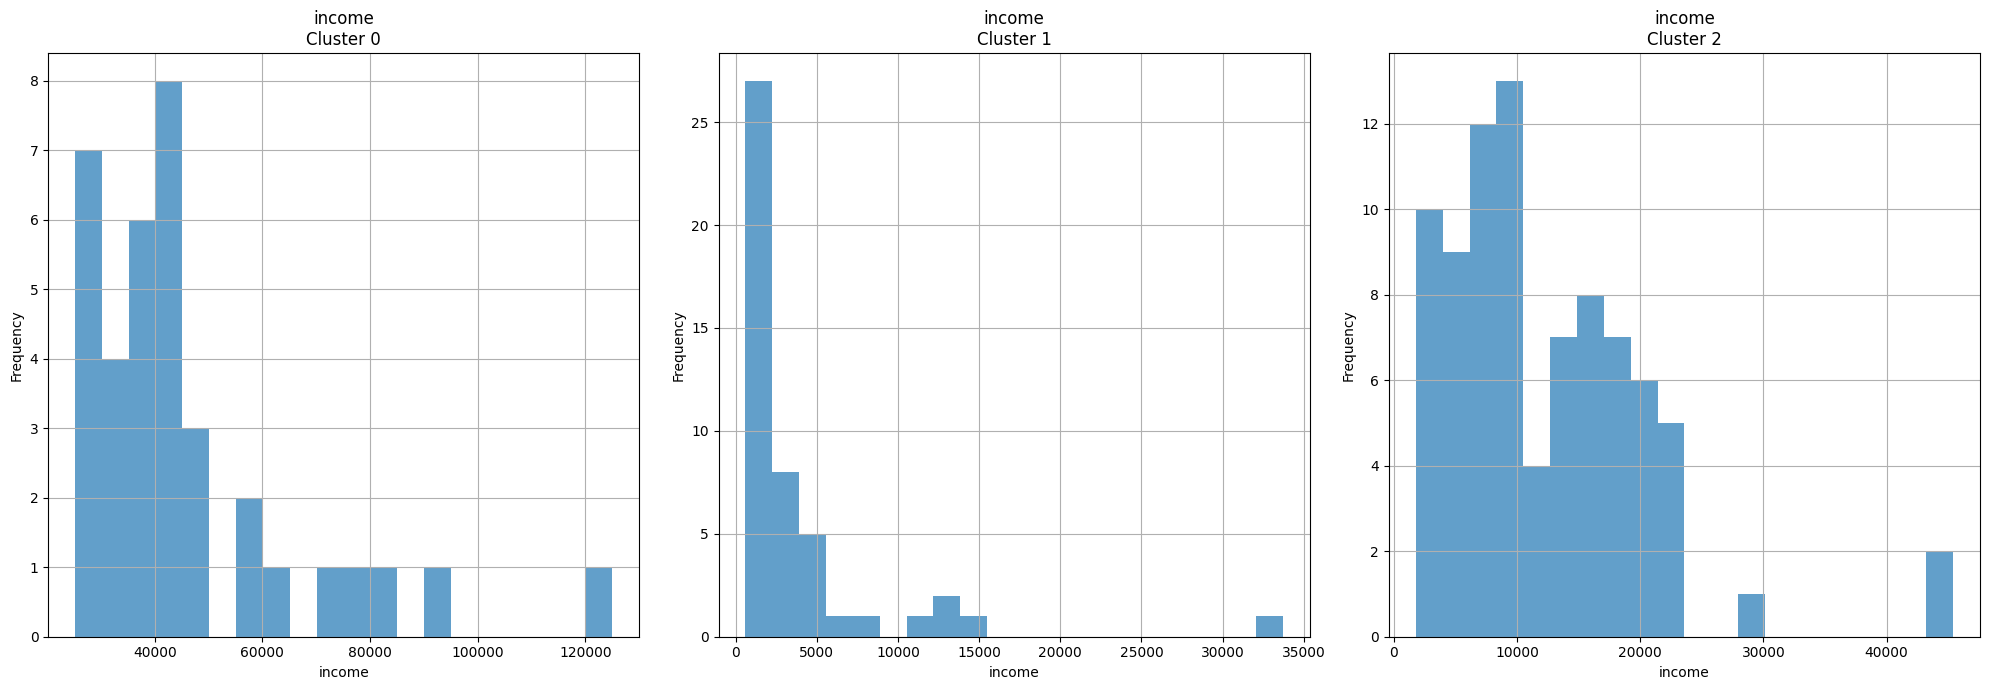

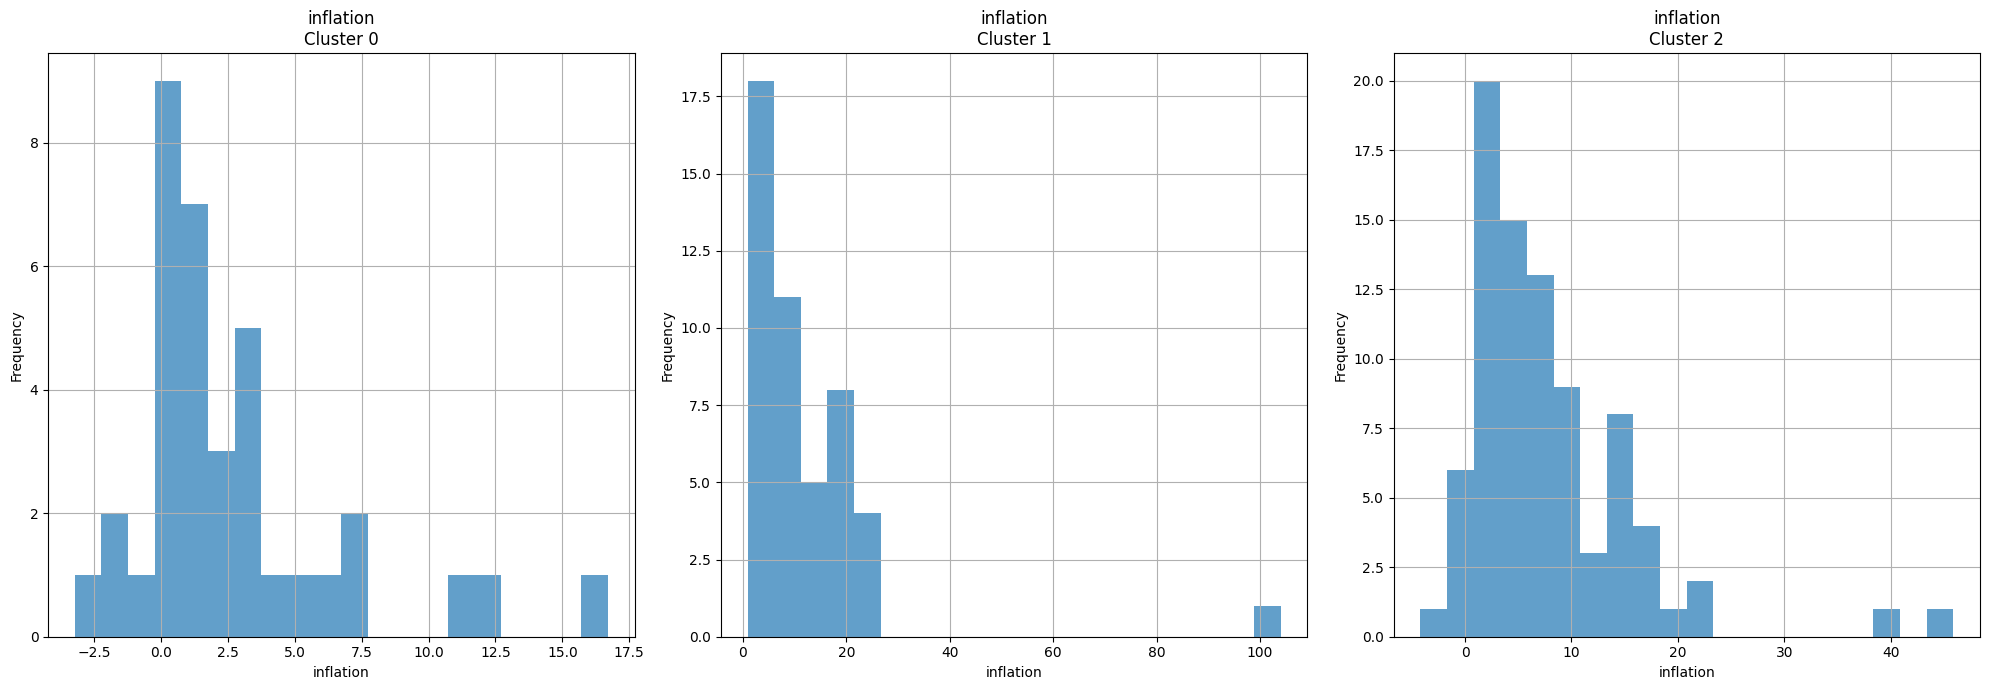

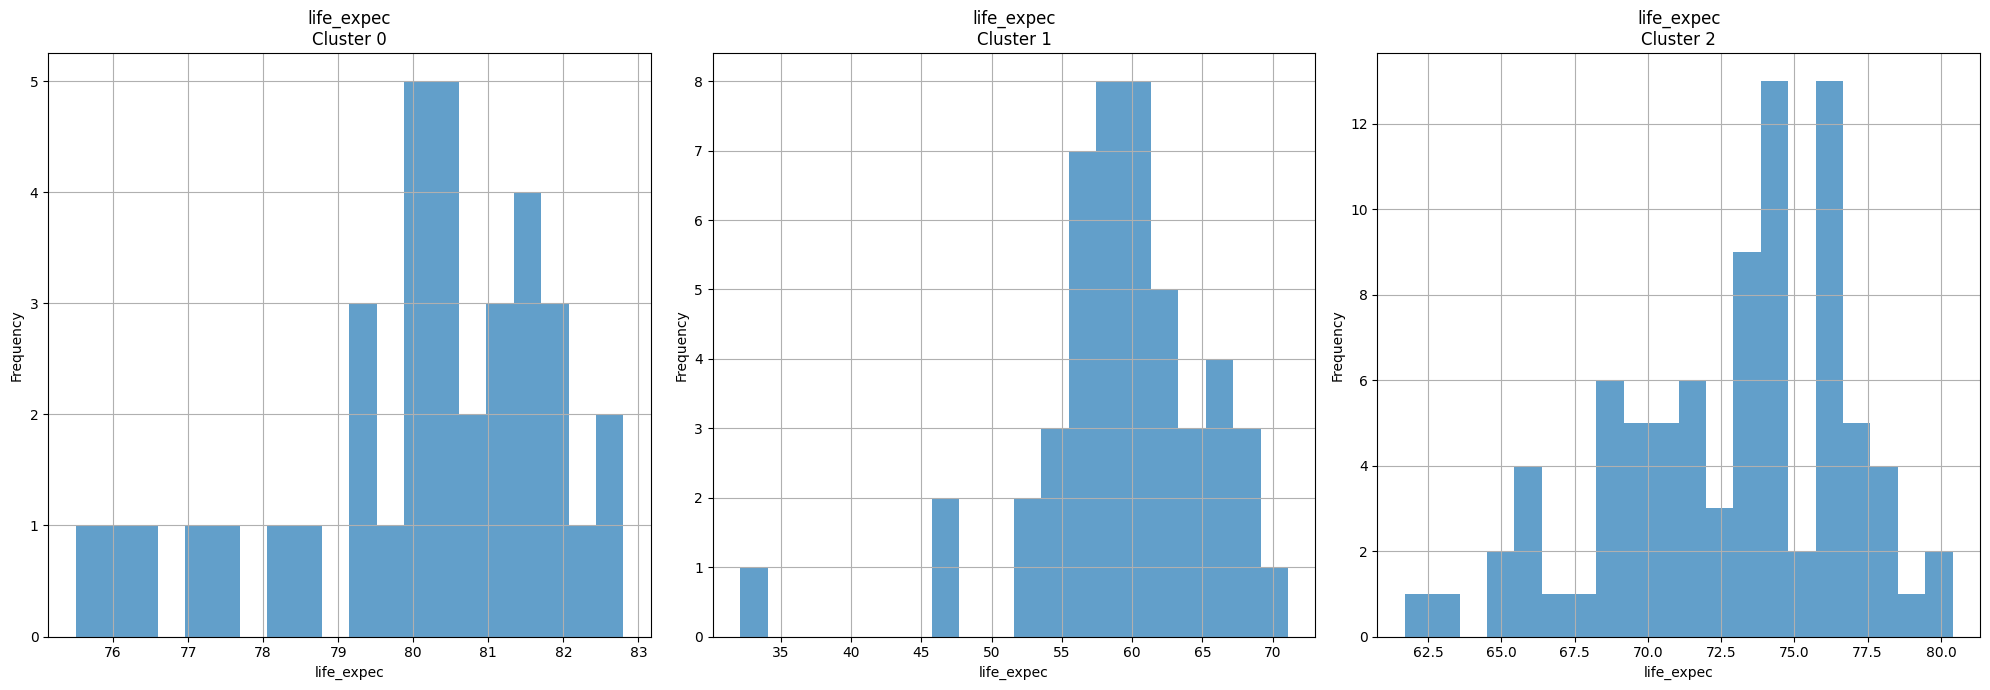

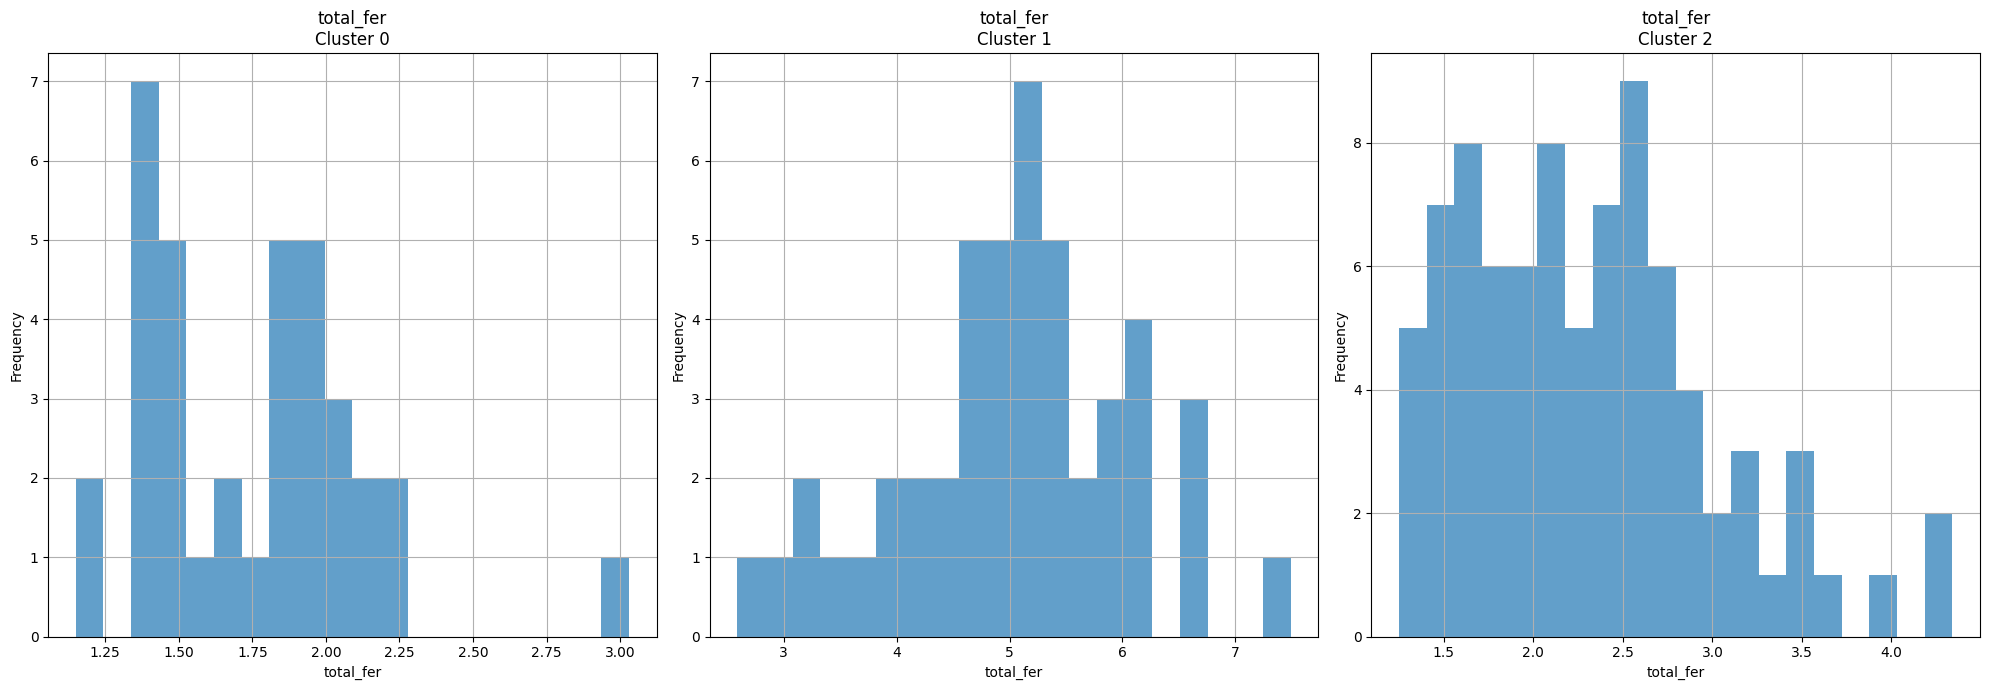

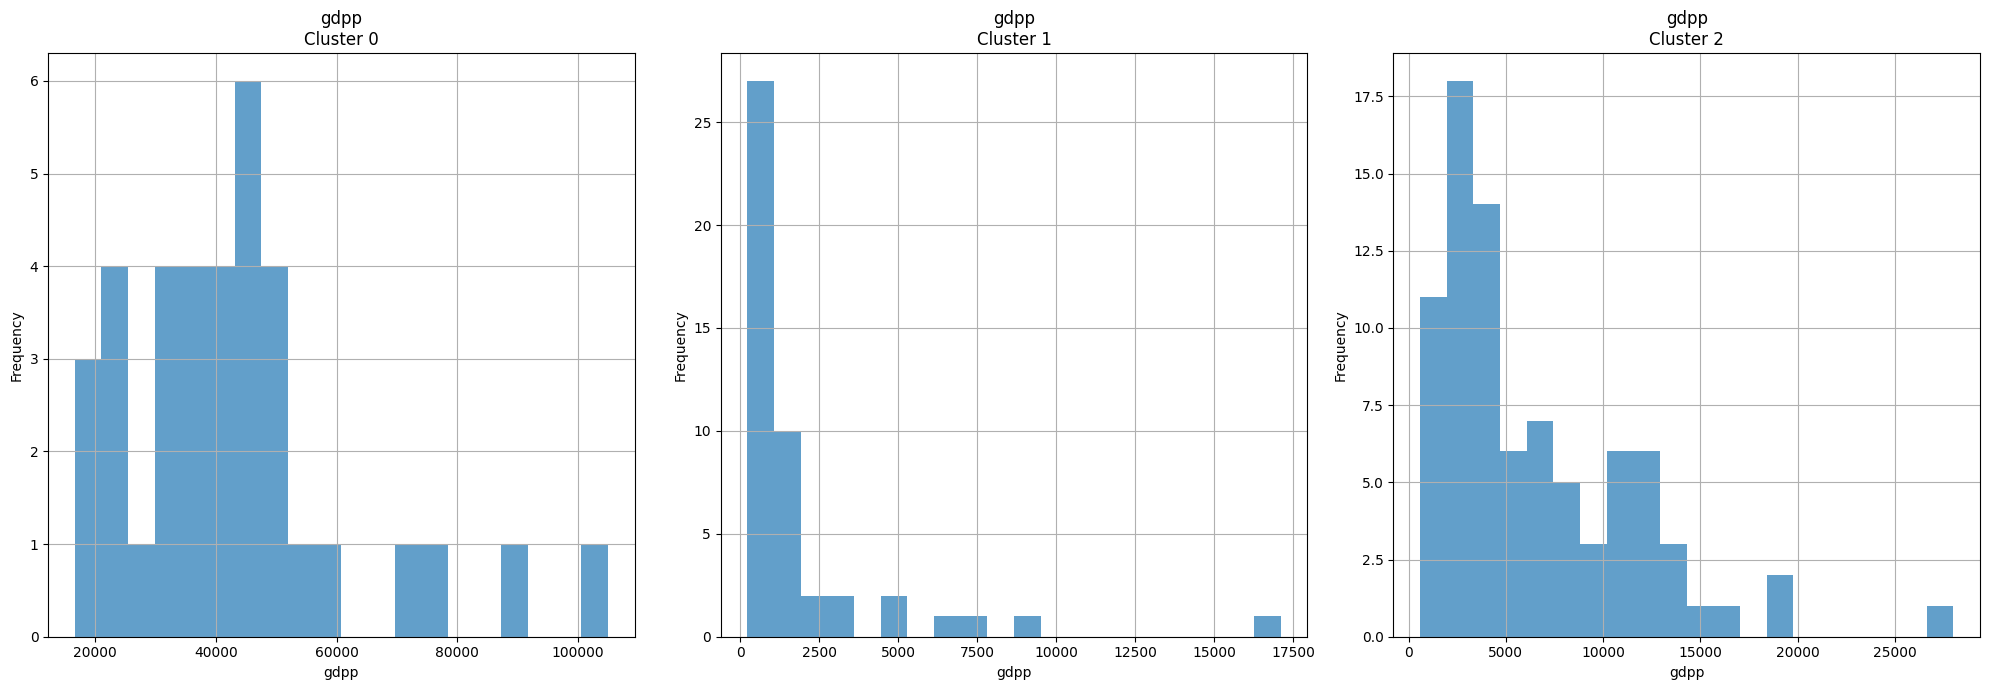

In [36]:
# Plot the histograms for different clusters
for column in df_numeric.columns: 
    plt.figure(figsize=(20, 7))
    for cluster_id in range(3):
        plt.subplot(1, 3, cluster_id + 1)
        cluster_data = df_cluster[df_cluster['cluster'] == cluster_id]
        cluster_data[column].hist(bins=20, alpha=0.7)
        plt.title('{}\nCluster {}'.format(column, cluster_id))
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [37]:
# concatenate the clusters labels to our original dataframe
df_cluster_country = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)

cluster_2_df = df_cluster_country[df_cluster_country['cluster'] == 1]

sorted_cluster_2_df = cluster_2_df.sort_values(by=['life_expec', 'child_mort', 'gdpp'], ascending=[True, False, True])

sorted_cluster_2_df.head(10)['country'].to_list()

['Haiti',
 'Lesotho',
 'Central African Republic',
 'Zambia',
 'Malawi',
 'South Africa',
 'Mozambique',
 'Sierra Leone',
 'Guinea-Bissau',
 'Afghanistan']

##### Summary

**Cluster 0: Developed Nations**
- **Child Mortality:** Low rates, suggesting effective healthcare and child welfare systems.
- **Exports and Imports:** Moderate to high, indicative of a robust trade infrastructure.
- **Health Expenditures:** Higher spending on health.
- **Income:** Generally higher, with many data points indicating a well-distributed income scale.
- **Inflation:** Lower, indicating stable economic conditions.
- **Life Expectancy:** High, which is typical for nations with advanced healthcare systems.
- **Fertility Rates:** Lower, correlating with higher education levels and access to family planning.
- **GDP per Capita:** High, with peaks around $40,000, supporting high standards of living and strong economic development.

**Cluster 1: Underdeveloped Nations**
- **Child Mortality:** High rates, pointing to inadequate healthcare services.
- **Exports and Imports:** Lower, which could indicate limited integration into global markets.
- **Health Expenditures:** Lower, suggesting limited access to healthcare.
- **Income:** Predominantly low, reflecting widespread poverty.
- **Inflation:** Higher, which may reflect economic instability.
- **Life Expectancy:** Significantly lower, due to poor health infrastructure and other socio-economic factors.
- **Fertility Rates:** Higher, often seen in nations with lower access to education and healthcare.
- **GDP per Capita:** Very low, generally below $2,500, indicating severe economic challenges.

**Cluster 2: Developing Nations**
- **Child Mortality:** Moderate to high, suggesting improving but still challenging healthcare conditions.
- **Exports and Imports:** Varied, but generally lower than developed nations, indicating growing trade activities.
- **Health Expenditures:** Moderate, showing efforts to improve healthcare access.
- **Income:** Ranges from low to moderate, indicating gradual economic progress.
- **Inflation:** Varied, with many experiencing moderate to high rates, a common challenge in developing economies.
- **Life Expectancy:** Moderate, better than underdeveloped nations but below developed ones.
- **Fertility Rates:** Moderate to high, transitioning as education and healthcare improve.
- **GDP per Capita:** Mostly below $10,000, reflecting emerging economic conditions.

#### Principal Componennt Analysis (PCA)

![PCA](Images/PCA.png)

In [38]:
from sklearn.decomposition import PCA

# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)

In [39]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.913025,0.095621
1,0.429911,-0.588156
2,-0.285225,-0.455174
3,-2.932423,1.695555
4,1.033576,0.136659


In [40]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.913025,0.095621,1
1,0.429911,-0.588156,2
2,-0.285225,-0.455174,2
3,-2.932423,1.695555,1
4,1.033576,0.136659,2


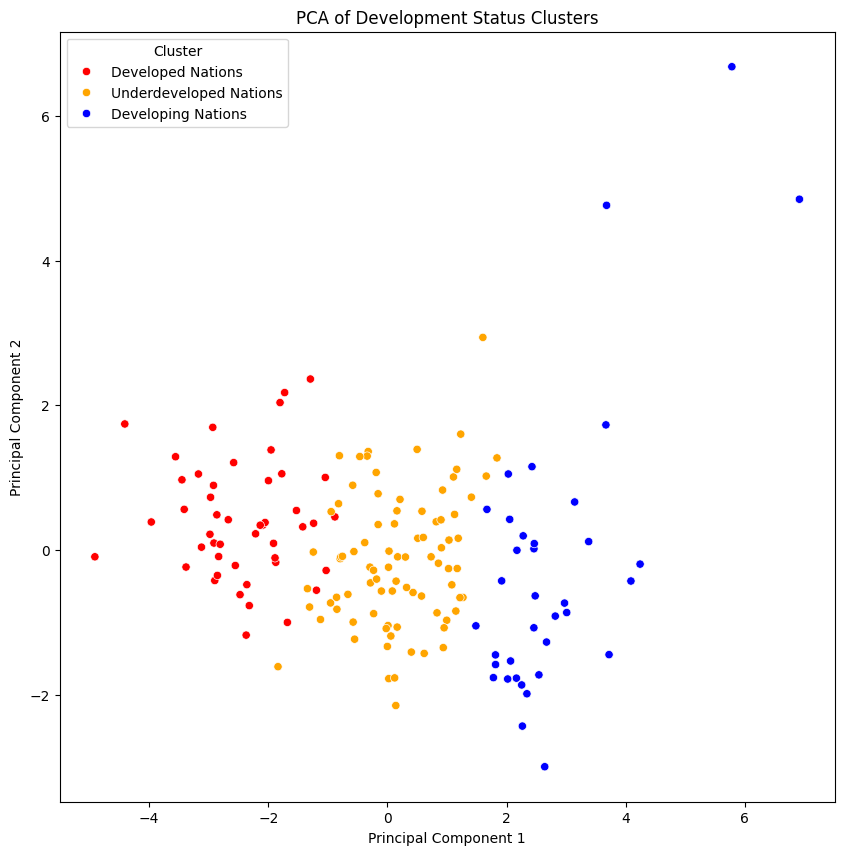

In [41]:
# Dictionary to map numerical cluster labels to meaningful names
cluster_names = {0: 'Developing Nations', 1: 'Developed Nations', 2: 'Underdeveloped Nations'}

# Update the cluster labels in the DataFrame
pca_df['cluster'] = pca_df['cluster'].map(cluster_names)

# Plot the scatter plot with updated cluster labels
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df, palette=['red', 'orange', 'blue'])
plt.title('PCA of Development Status Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

#### Autoencoders

![auto-encoders](Images/auto-encoders_1.png)

![auto-encoders](Images/auto-encoders_2.png)

![auto-encoders](Images/auto-encoders_3.png)

In [42]:

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform

encoding_dim = 3

input_df = Input(shape=(9,))

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(128, activation='relu', kernel_initializer=glorot_uniform())(x)
x = Dense(128, activation='relu', kernel_initializer=glorot_uniform())(x)
x = Dense(256, activation='relu', kernel_initializer=glorot_uniform())(x)

encoded = Dense(encoding_dim, activation='relu', kernel_initializer=glorot_uniform())(x)

x = Dense(256, activation='relu', kernel_initializer= 'glorot_uniform')(encoded)
x = Dense(128, activation='relu', kernel_initializer= 'glorot_uniform')(x)
x = Dense(128, activation='relu', kernel_initializer= 'glorot_uniform')(x)

decoded = Dense(9, activation='sigmoid', kernel_initializer=glorot_uniform())(x)

# Autoencoder
autoencoder = Model(input_df, decoded)

# Encoder - used for our dimension reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')


2024-05-14 20:33:53.725294: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-05-14 20:33:53.725317: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 48.00 GB
2024-05-14 20:33:53.725321: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 18.00 GB
2024-05-14 20:33:53.725351: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-14 20:33:53.725364: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [43]:
df_scaled.shape

(167, 9)

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

autoencoder.fit(df_scaled, df_scaled, batch_size=32, epochs=50, verbose=1, callbacks=[early_stopping])

Epoch 1/50


2024-05-14 20:33:54.106832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 1s 29ms/step - loss: 1.2131
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 1.0488
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 1.0139
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 1.0118
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0369
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0567
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 1.1245
Epoch 8/50
6/6 [==============================] - 0s 7ms/step - loss: 1.1266
Epoch 9/50
6/6 [==============================] - 0s 10ms/step - loss: 1.1211


In [45]:
pred = encoder.predict(df_scaled)

6/6 [==============================] - 0s 2ms/step


2024-05-14 20:33:54.890307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/miniconda3/envs/DSProjects/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/miniconda3/envs/DSProjects/lib/python3.

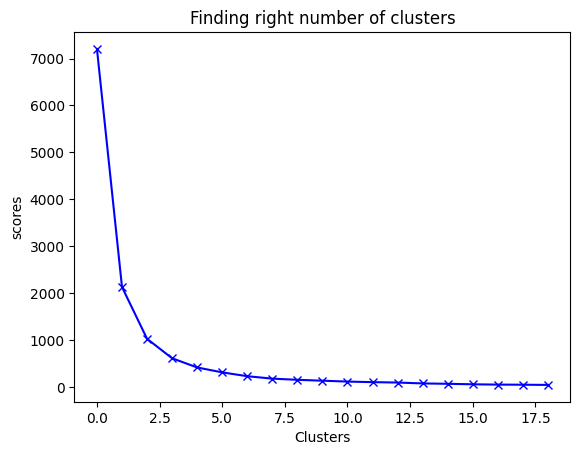

In [46]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

/var/folders/7w/91yzmsvx30sfywvm8z7prz5c0000gn/T/ipykernel_78985/2080318352.py:2: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.

/var/folders/7w/91yzmsvx30sfywvm8z7prz5c0000gn/T/ipykernel_78985/2080318352.py:4: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.



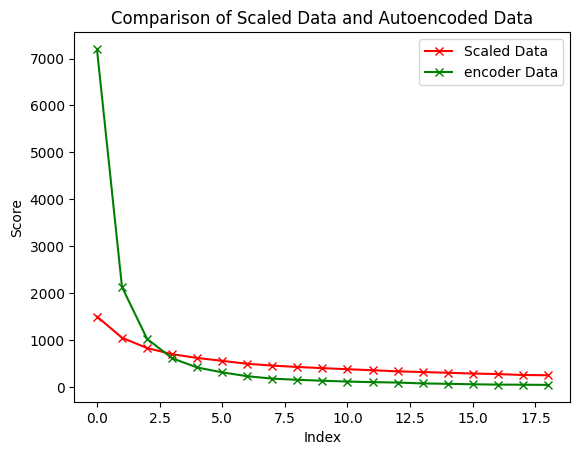

In [47]:
# Plot scores_1 with a label
plt.plot(scores_1, 'bx-', color='r', label='Scaled Data')
# Plot scores_2 with a label
plt.plot(scores_2, 'bx-', color='g', label='encoder Data')

# Add legends to the plot
plt.legend()

# Optionally, add titles and labels for better clarity
plt.title('Comparison of Scaled Data and Autoencoded Data')
plt.xlabel('Index')
plt.ylabel('Score')

# Display the plot
plt.show()

### Tableau Dashboard